Given are values $f_j=f(x_j)$ for $x_j=j/n$, with $n=2^p$.  Compute the coefficients of the Discrete Fourier Transfrom (DFT) 

$$a_k=\frac{1}{n} \sum_{j=0}^{n-1} e^{\frac{2\pi i jk}{n}} f_j$$

using the FFT algorithm from scipy.

(a)  How big can you chose $n$ such that the run-time for the FFT is below 1 secondon your computer ?  How long would a straight forward evaluation of the DFT of the same size by a matrix-vector product take?  How much memory would be required?

(b)  How are the coefficients $a_k$ and $a_{n−k}$ related ?

(c)  Test the functions $f: [0,1]→R:$

$$f_1(x)   =   sin(40πx)$$
$$f_2(x)   =χ[0.25,0.75)$$
$$f_3(x)   =   min\{x,1−x\}$$
$$f_4(x)   =e^{−100(x−0.5)^2}$$
$$f_5(x)   =e^{−4(x−0.5)^2}$$
$$f_6(x)   =e^{−100(x−0.5)^2}sin(40πx)$$

How fast do coefficients fall for $i∈[0,n/2)$, i.e.  find $C$ and $\beta$ such that $|a_i| <= Ci^{−\beta}$, by visual inspection?  Try to explain your observations.

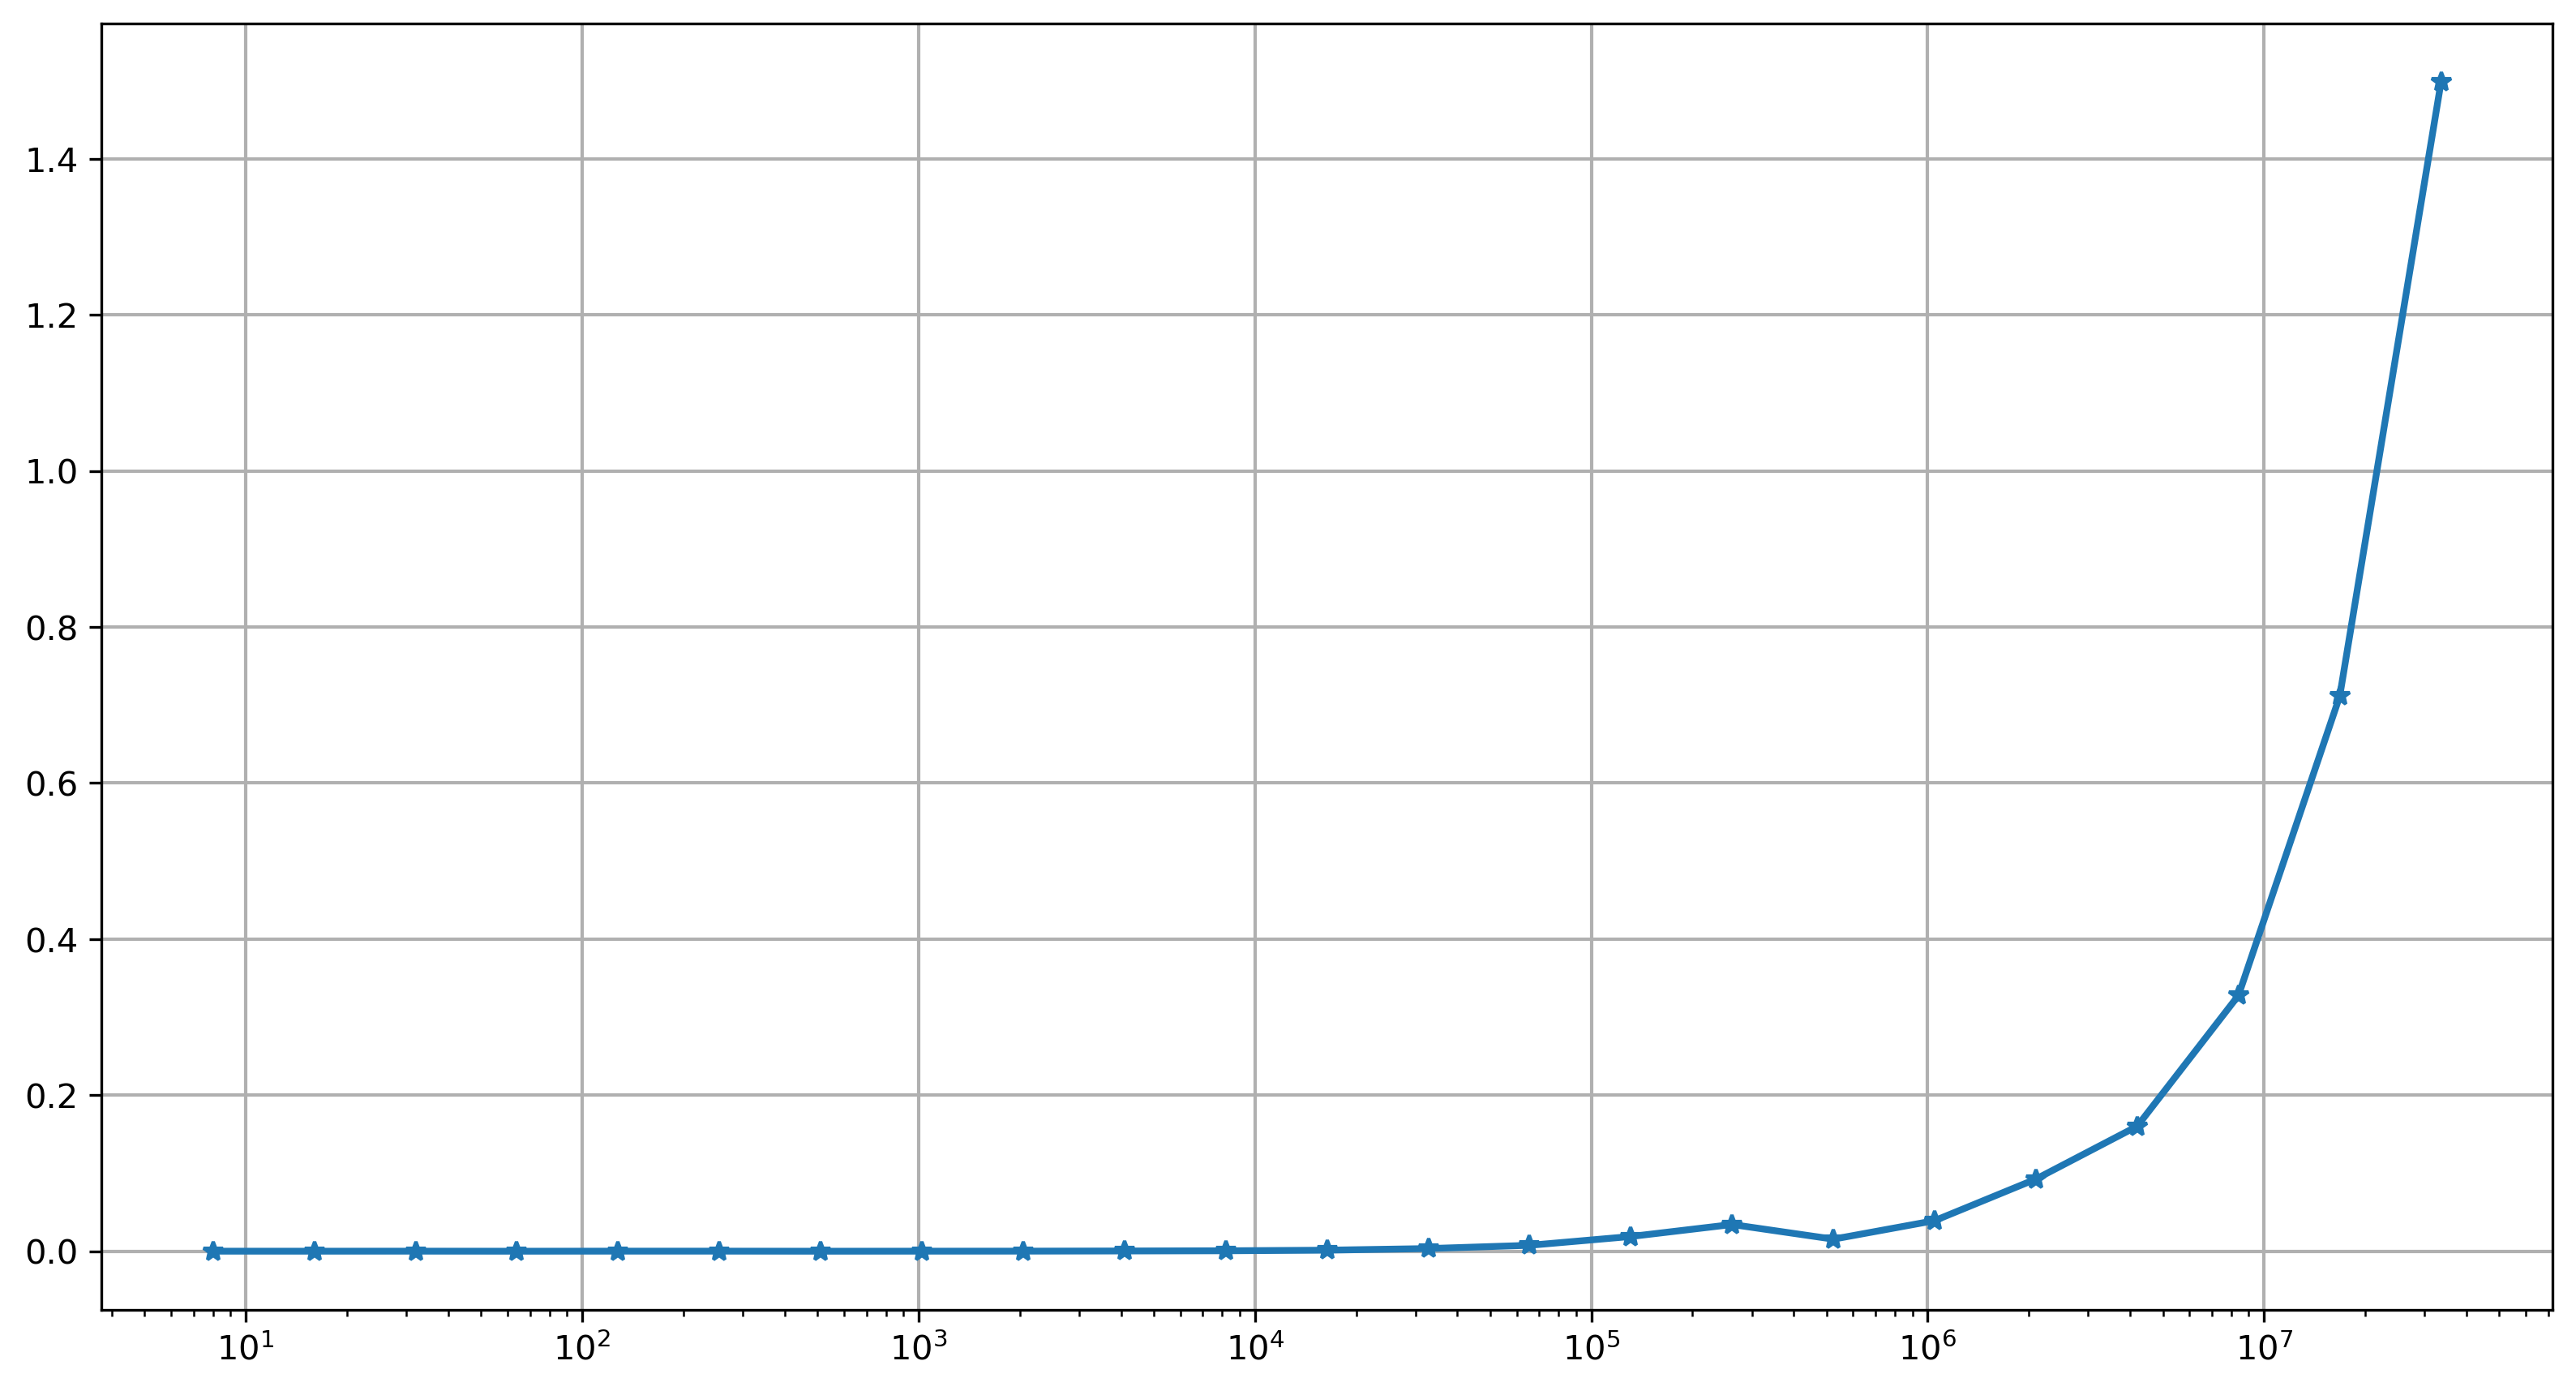

In [30]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import timeit

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['grid.linewidth'] = 1.0

p = 3
dt = 0

def fun(x):
    return np.sin(40*np.pi*x)

time_taken = []
n_list = []
while dt < 1:
    n = 2**p
    x = np.linspace(0, 1, n, endpoint=True)
    y = fun(x)
    
    start = timeit.default_timer()
    yf = sp.fft.fft(y)
    stop = timeit.default_timer()
    dt = stop - start
    p += 1
    
    time_taken.append(dt)
    n_list.append(n)
    
plt.figure(figsize = (13, 7))
plt.plot(n_list, time_taken, '*-')
plt.grid()
ax = plt.gca()
ax.set_xscale('log')


### Runtime approximation
Naive DFT implementation using a matrix multiplication of the conjungt complex V matrix has O(n^2). Expoiting the special strucutre of V leads to the FFT with O(n log n).

For FFT:

$$n = 10^7 \approx 1s$$

$$n log n \approx 2.3*10^8$$

For DFT:

$$n^2 = 10^{14}$$

-->
$$\frac{n^2}{n log n} \approx 2.3*10^5 $$

$$1s * 2.3*10^5 \approx 120h$$


### Memory usage
V is a n x n matrix with doubles. One double takes up 8 byte.

$$n^2 = 10^{14} byte$$

$$n^2 * 1024^{-4} \approx 91 TB$$


### (b) How are the coefficients  $𝑎_𝑘$  and  $𝑎_{𝑛−𝑘}$  related ?

For real values input signals y the coefficients $a_k$ and $a_{n-k}$ of FFT(y) are the complex conjungate of each other.
Explaination: The fourier series can be thought of the addition of rotationg vectors in the complex plane. In order for the sum to always remain on the real axis, the sum needs to include an identical rotation vector, rotating in the other direction (negative frequeny). That is why the amplitude spectrum of the FT of a real valued signal is symmetriy around f=0. 

Text(0.5, 1.0, 'Phase')

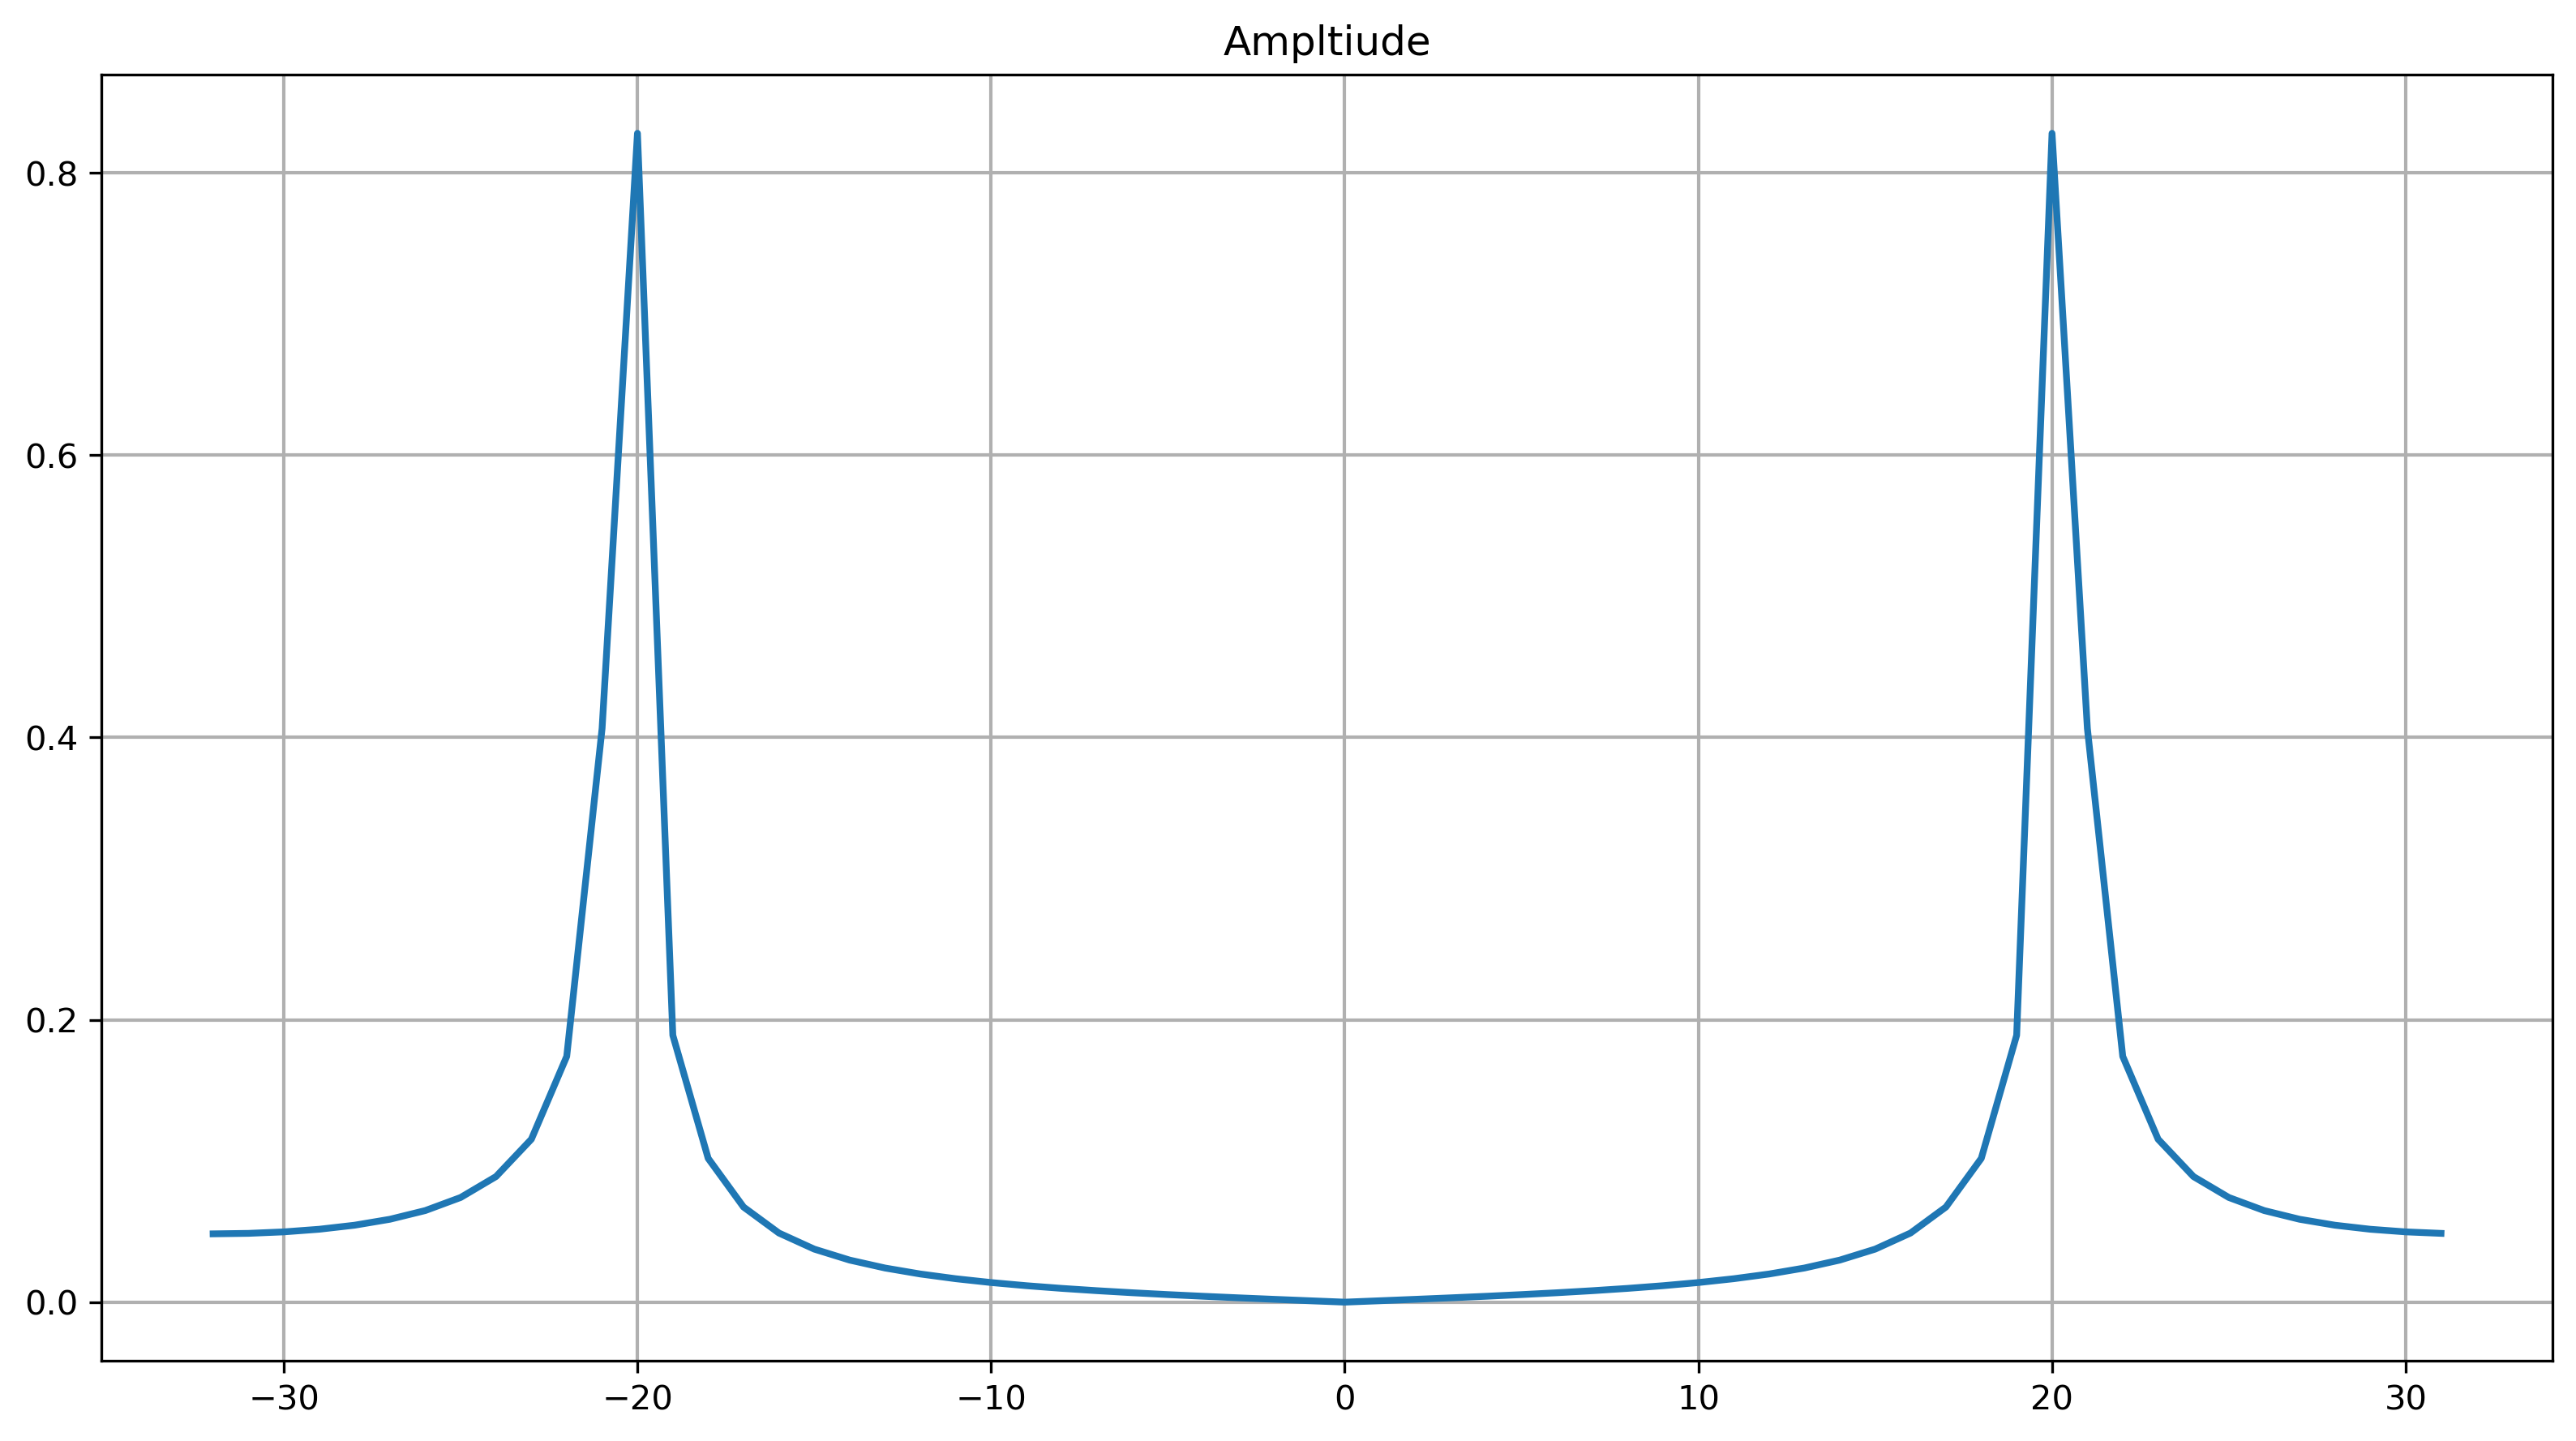

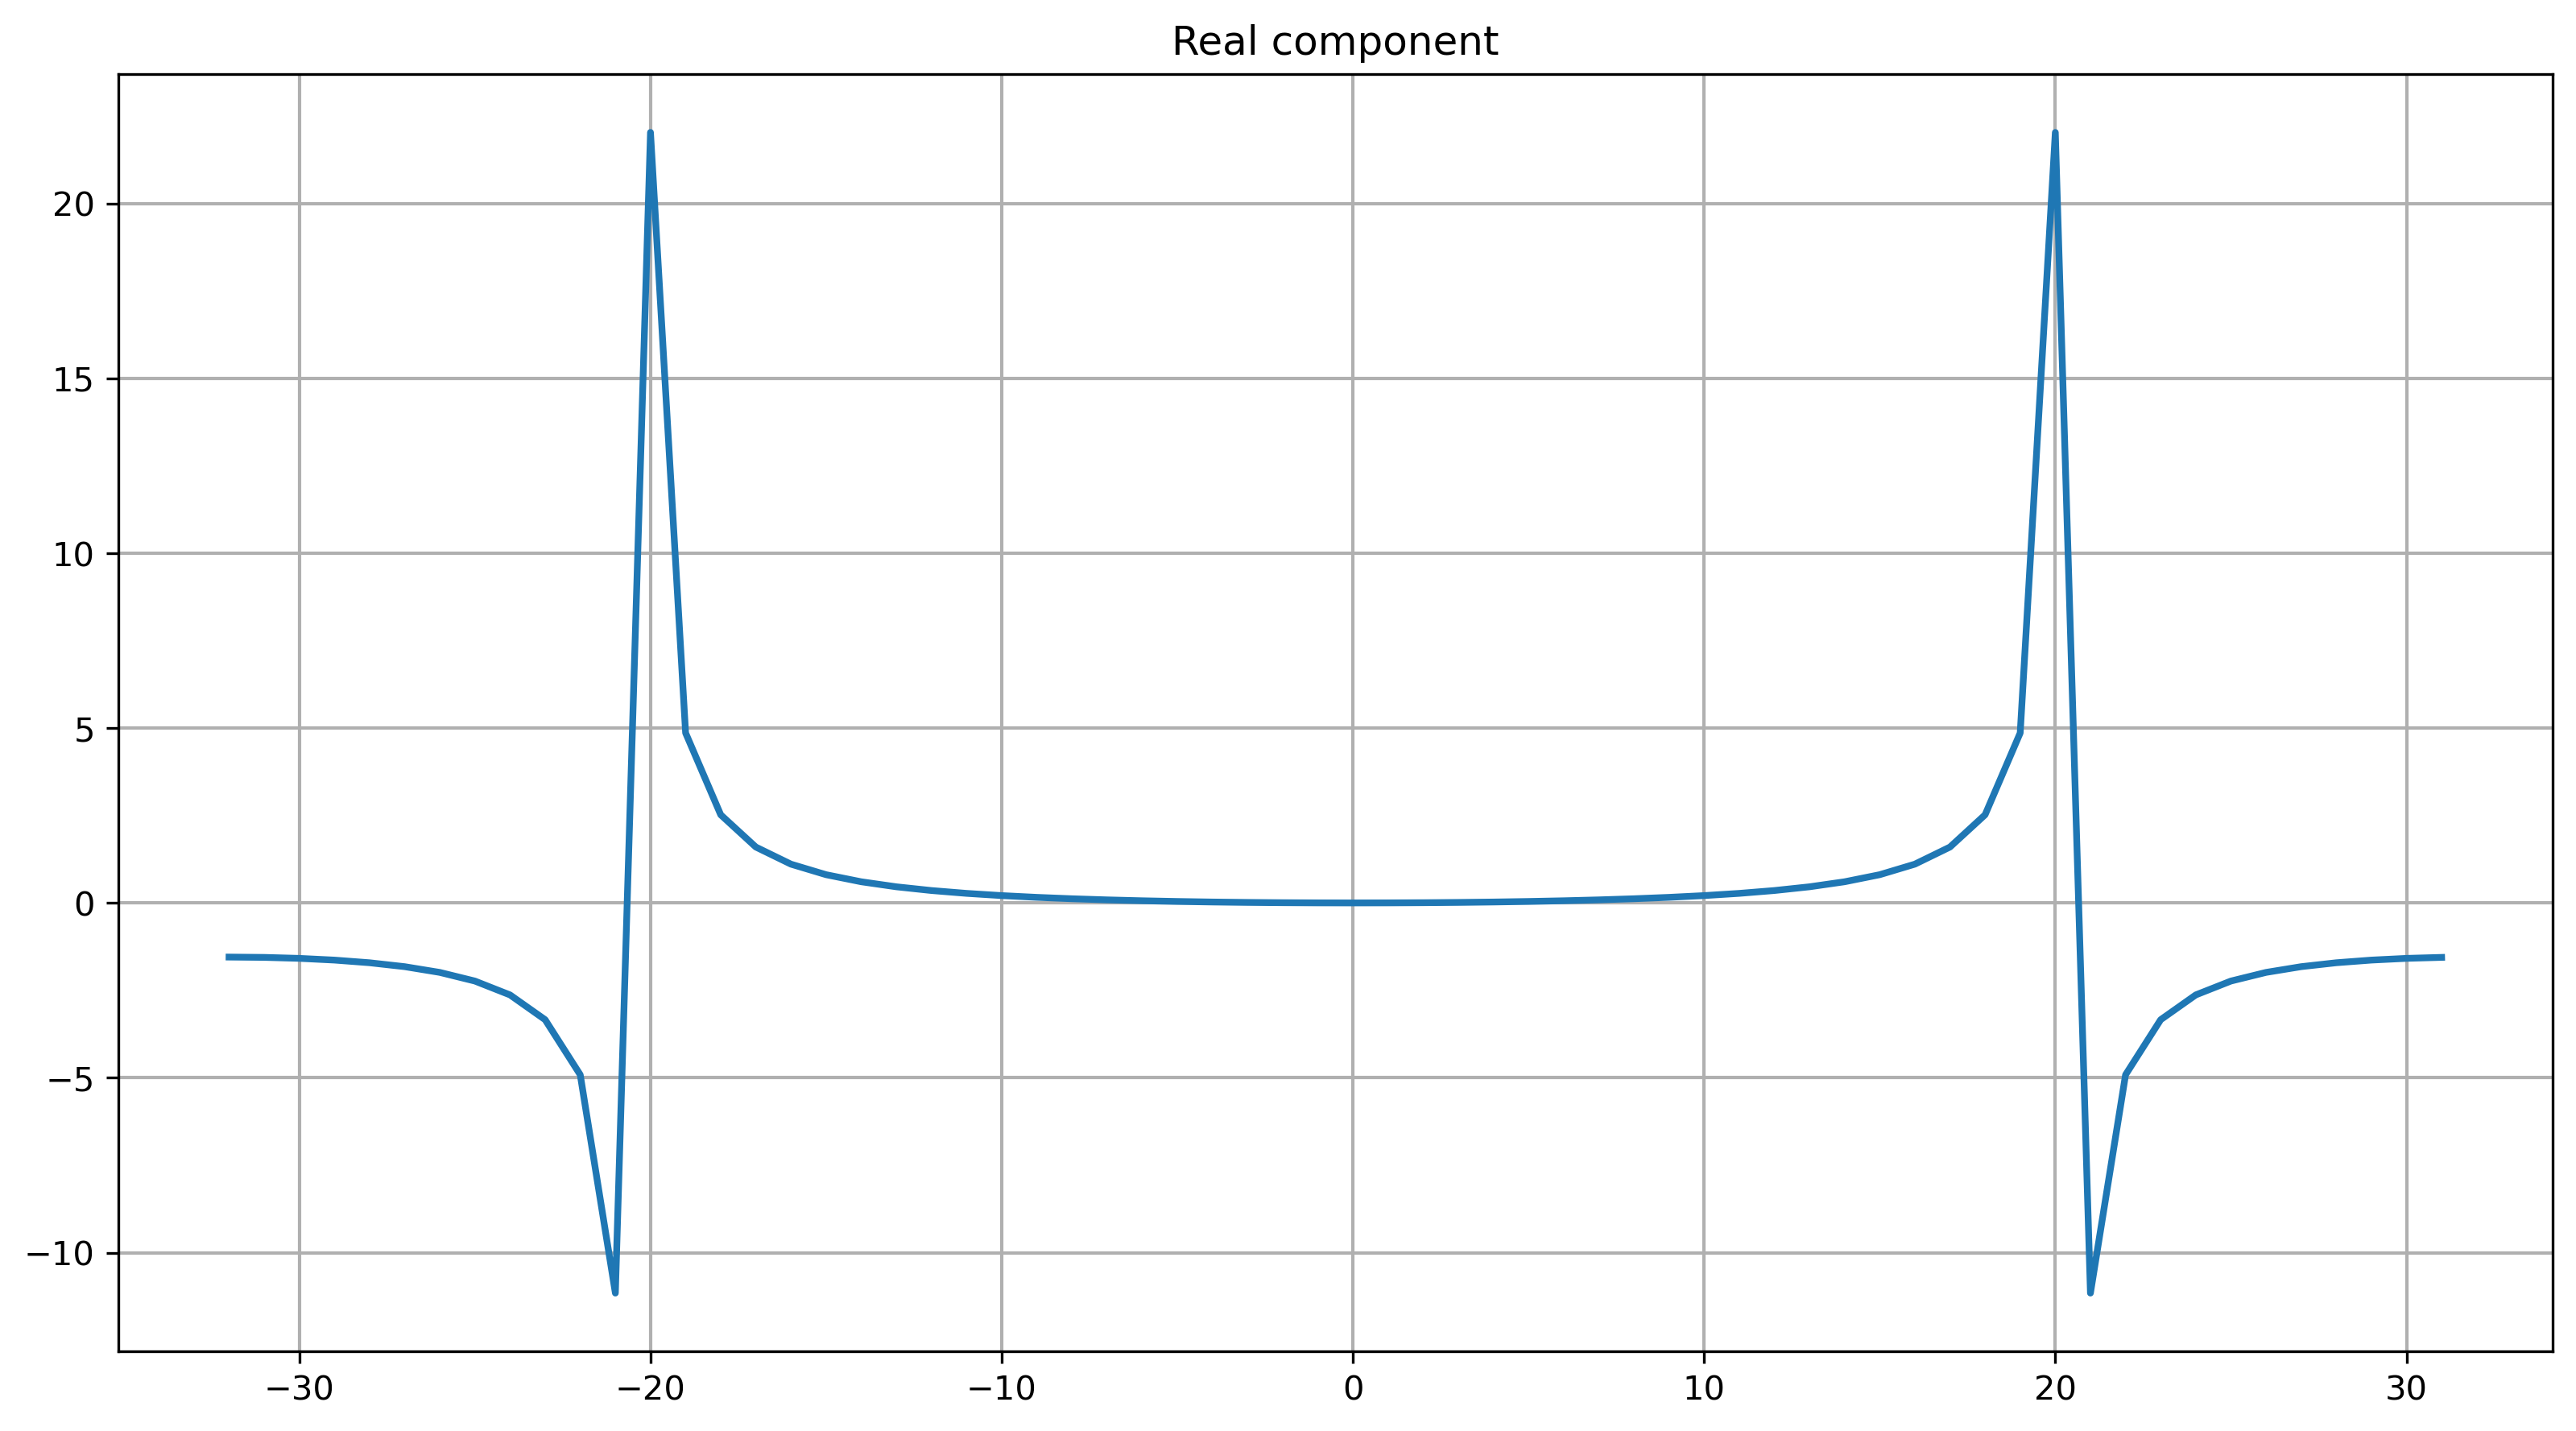

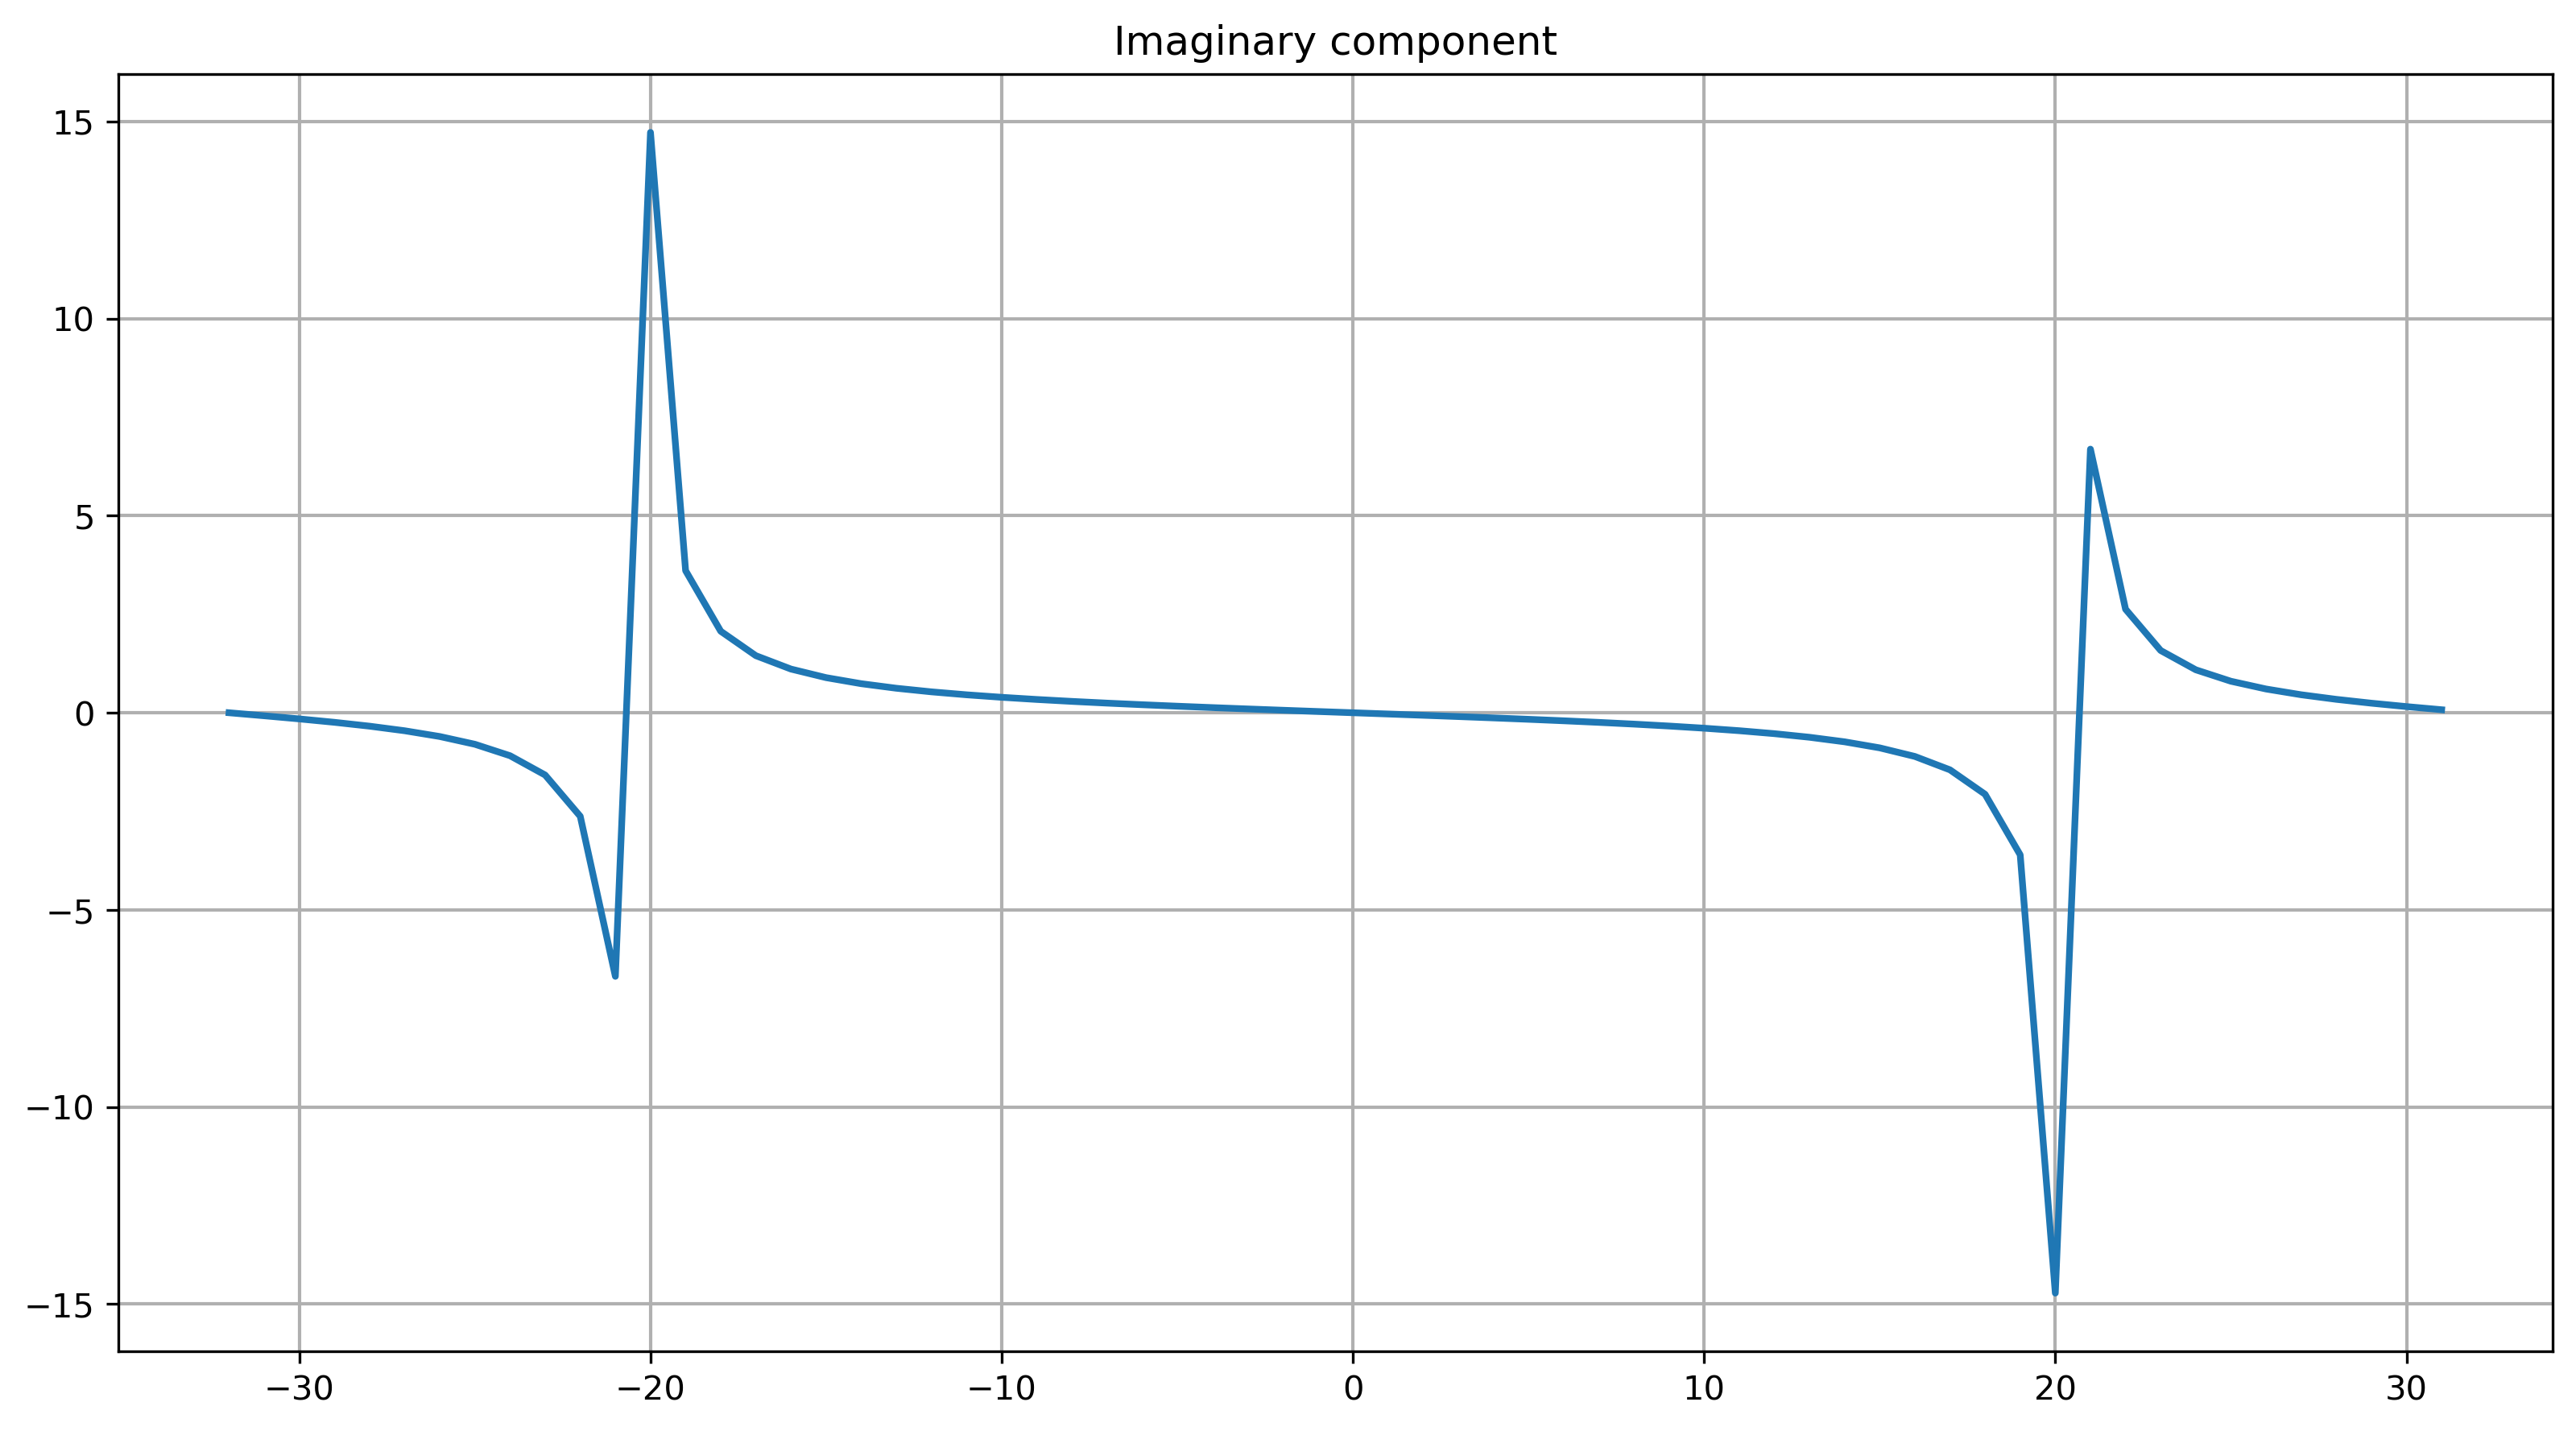

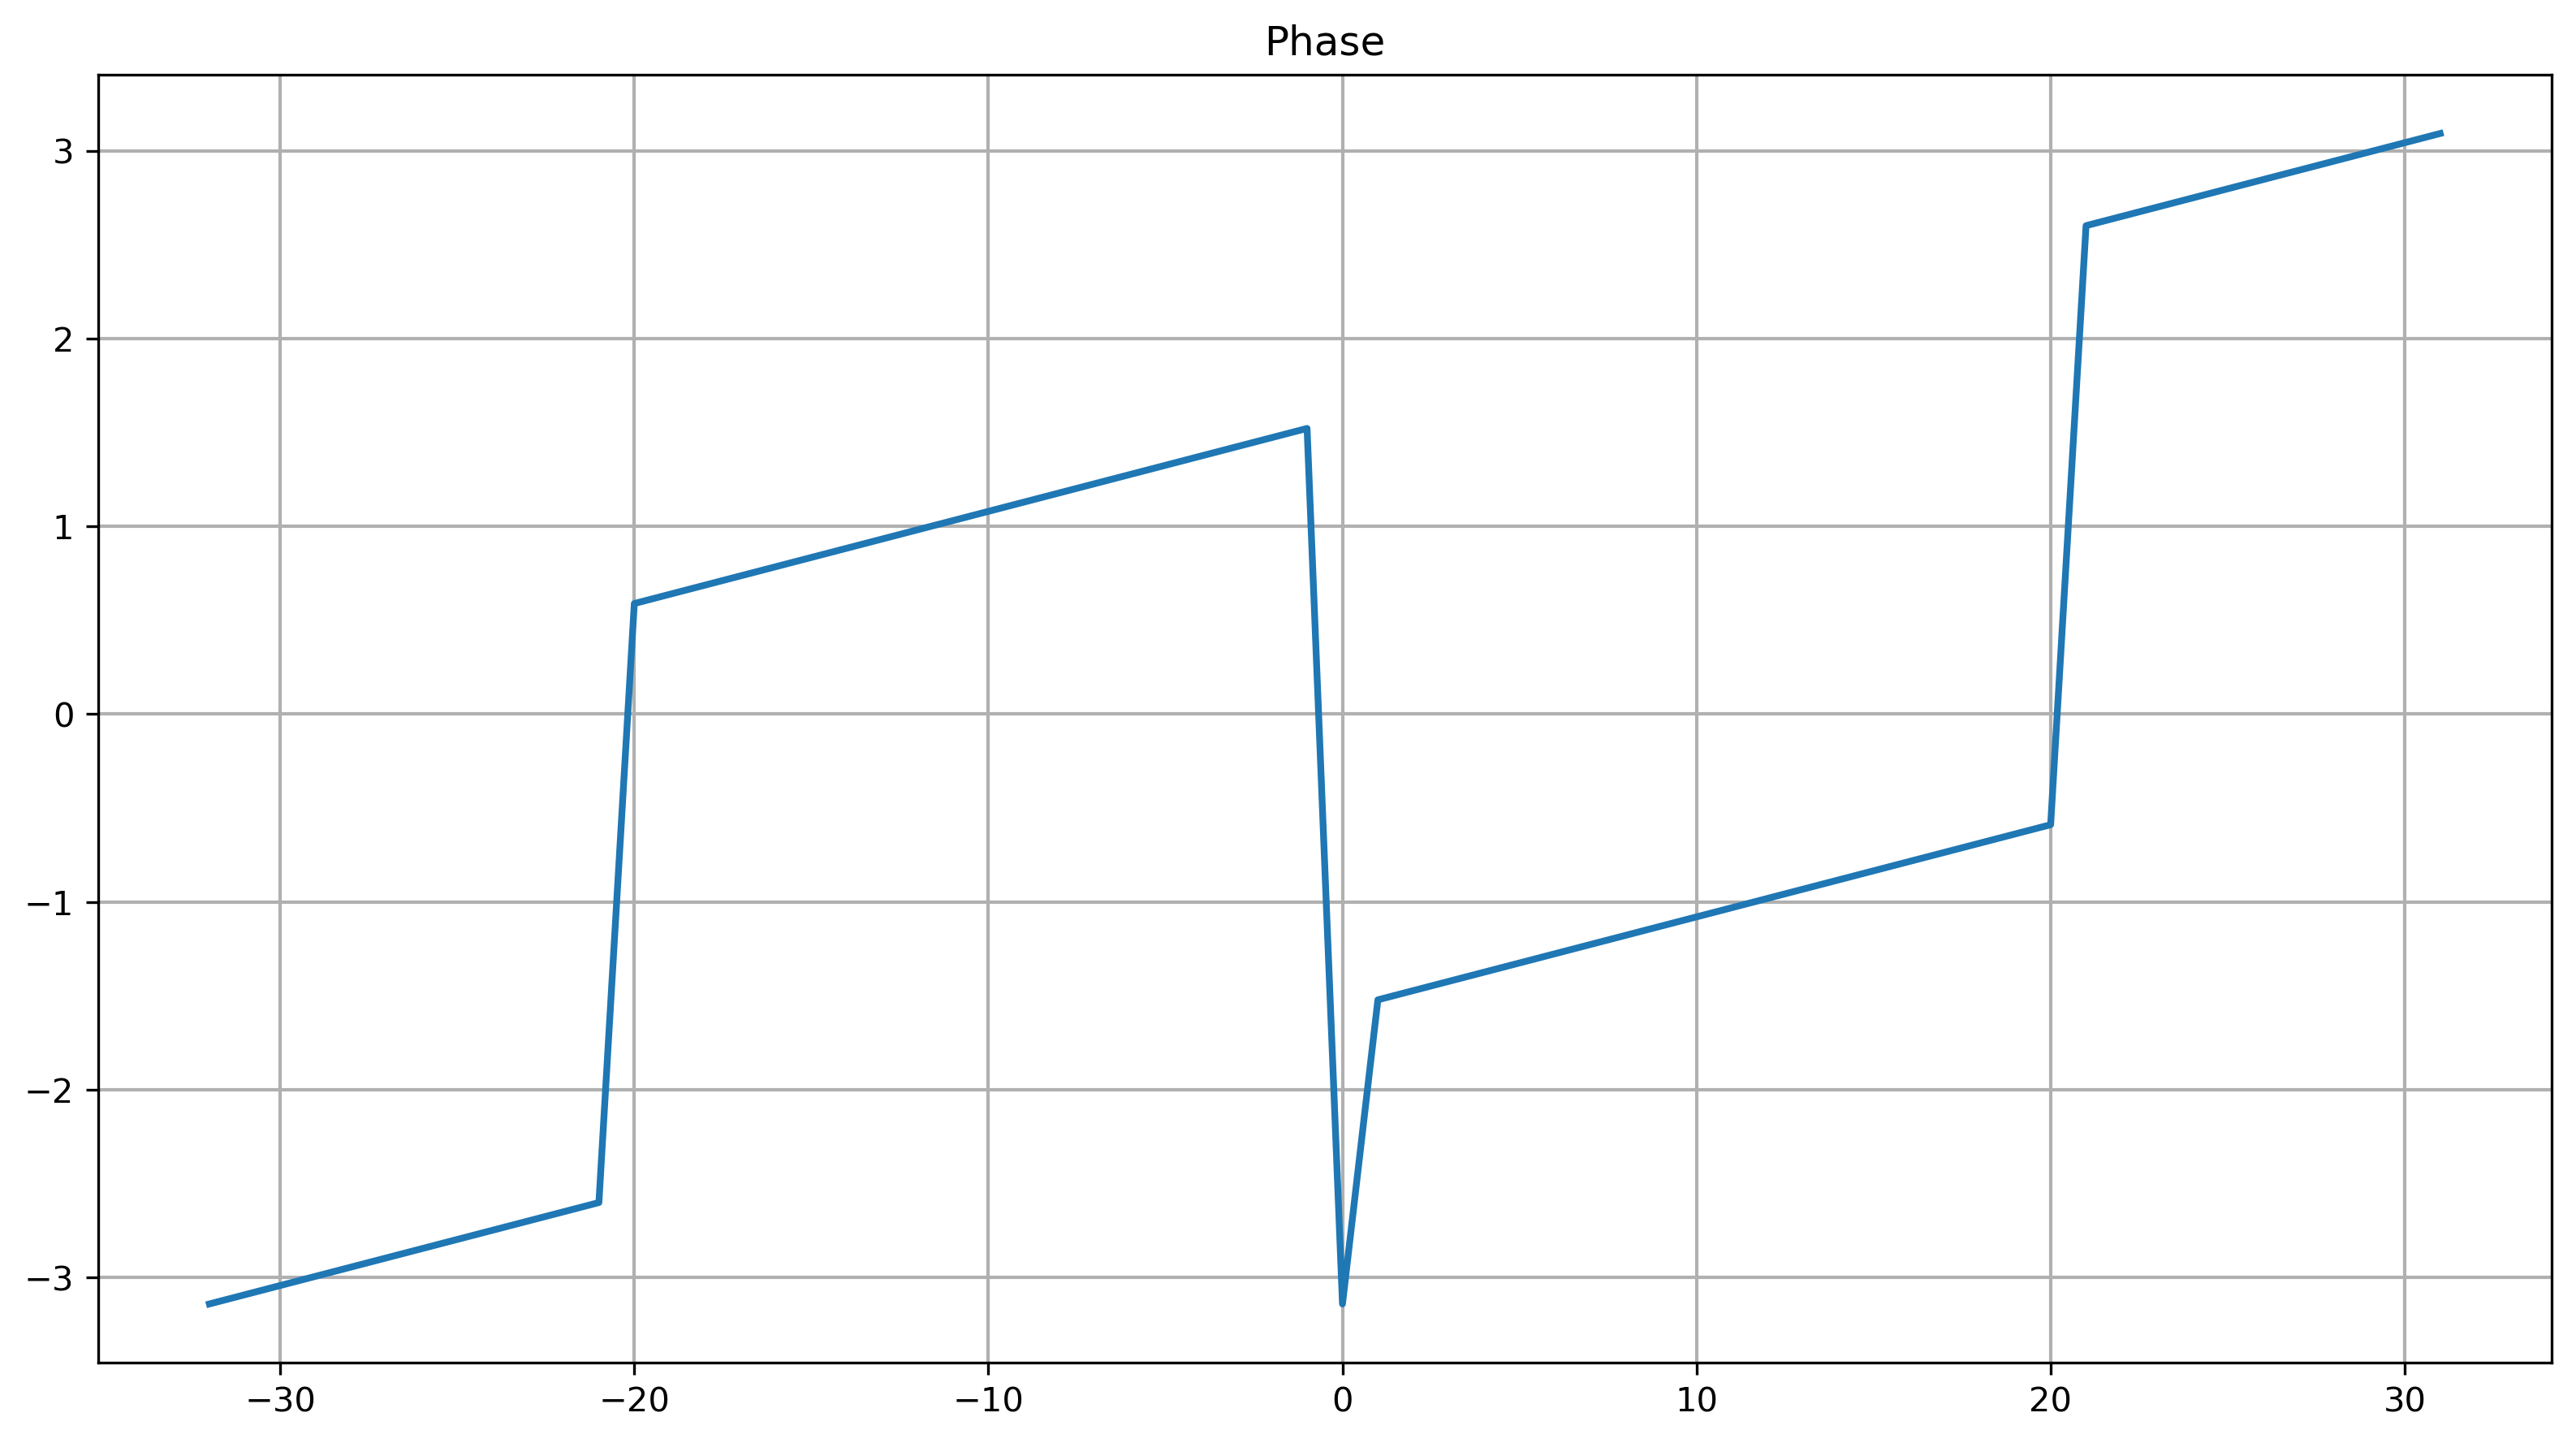

In [29]:
import warnings
warnings.filterwarnings('ignore')

n = 2**6
x = np.linspace(0, 1, n, endpoint=True)
y = fun(x)

yf = sp.fft.fft(y)
freq = sp.fft.fftfreq(int(n), 1/n)

freq = sp.fft.fftshift(freq)
yplot = sp.fft.fftshift(yf)

plt.figure(figsize = (13, 7))
plt.plot(freq, np.abs(yplot)*2/n)
plt.grid()
plt.title("Ampltiude")

plt.figure(figsize = (13, 7))
plt.plot(freq, yplot.real)
plt.grid()
plt.title("Real component")

plt.figure(figsize = (13, 7))
plt.plot(freq, yplot.imag)
plt.grid()
plt.title("Imaginary component")

p = np.angle(yplot)
p[p < 0] = p[p < 0]
plt.figure(figsize = (13, 7))
plt.plot(freq, p)
plt.grid()
plt.title("Phase")


### (c) Test the functions ...

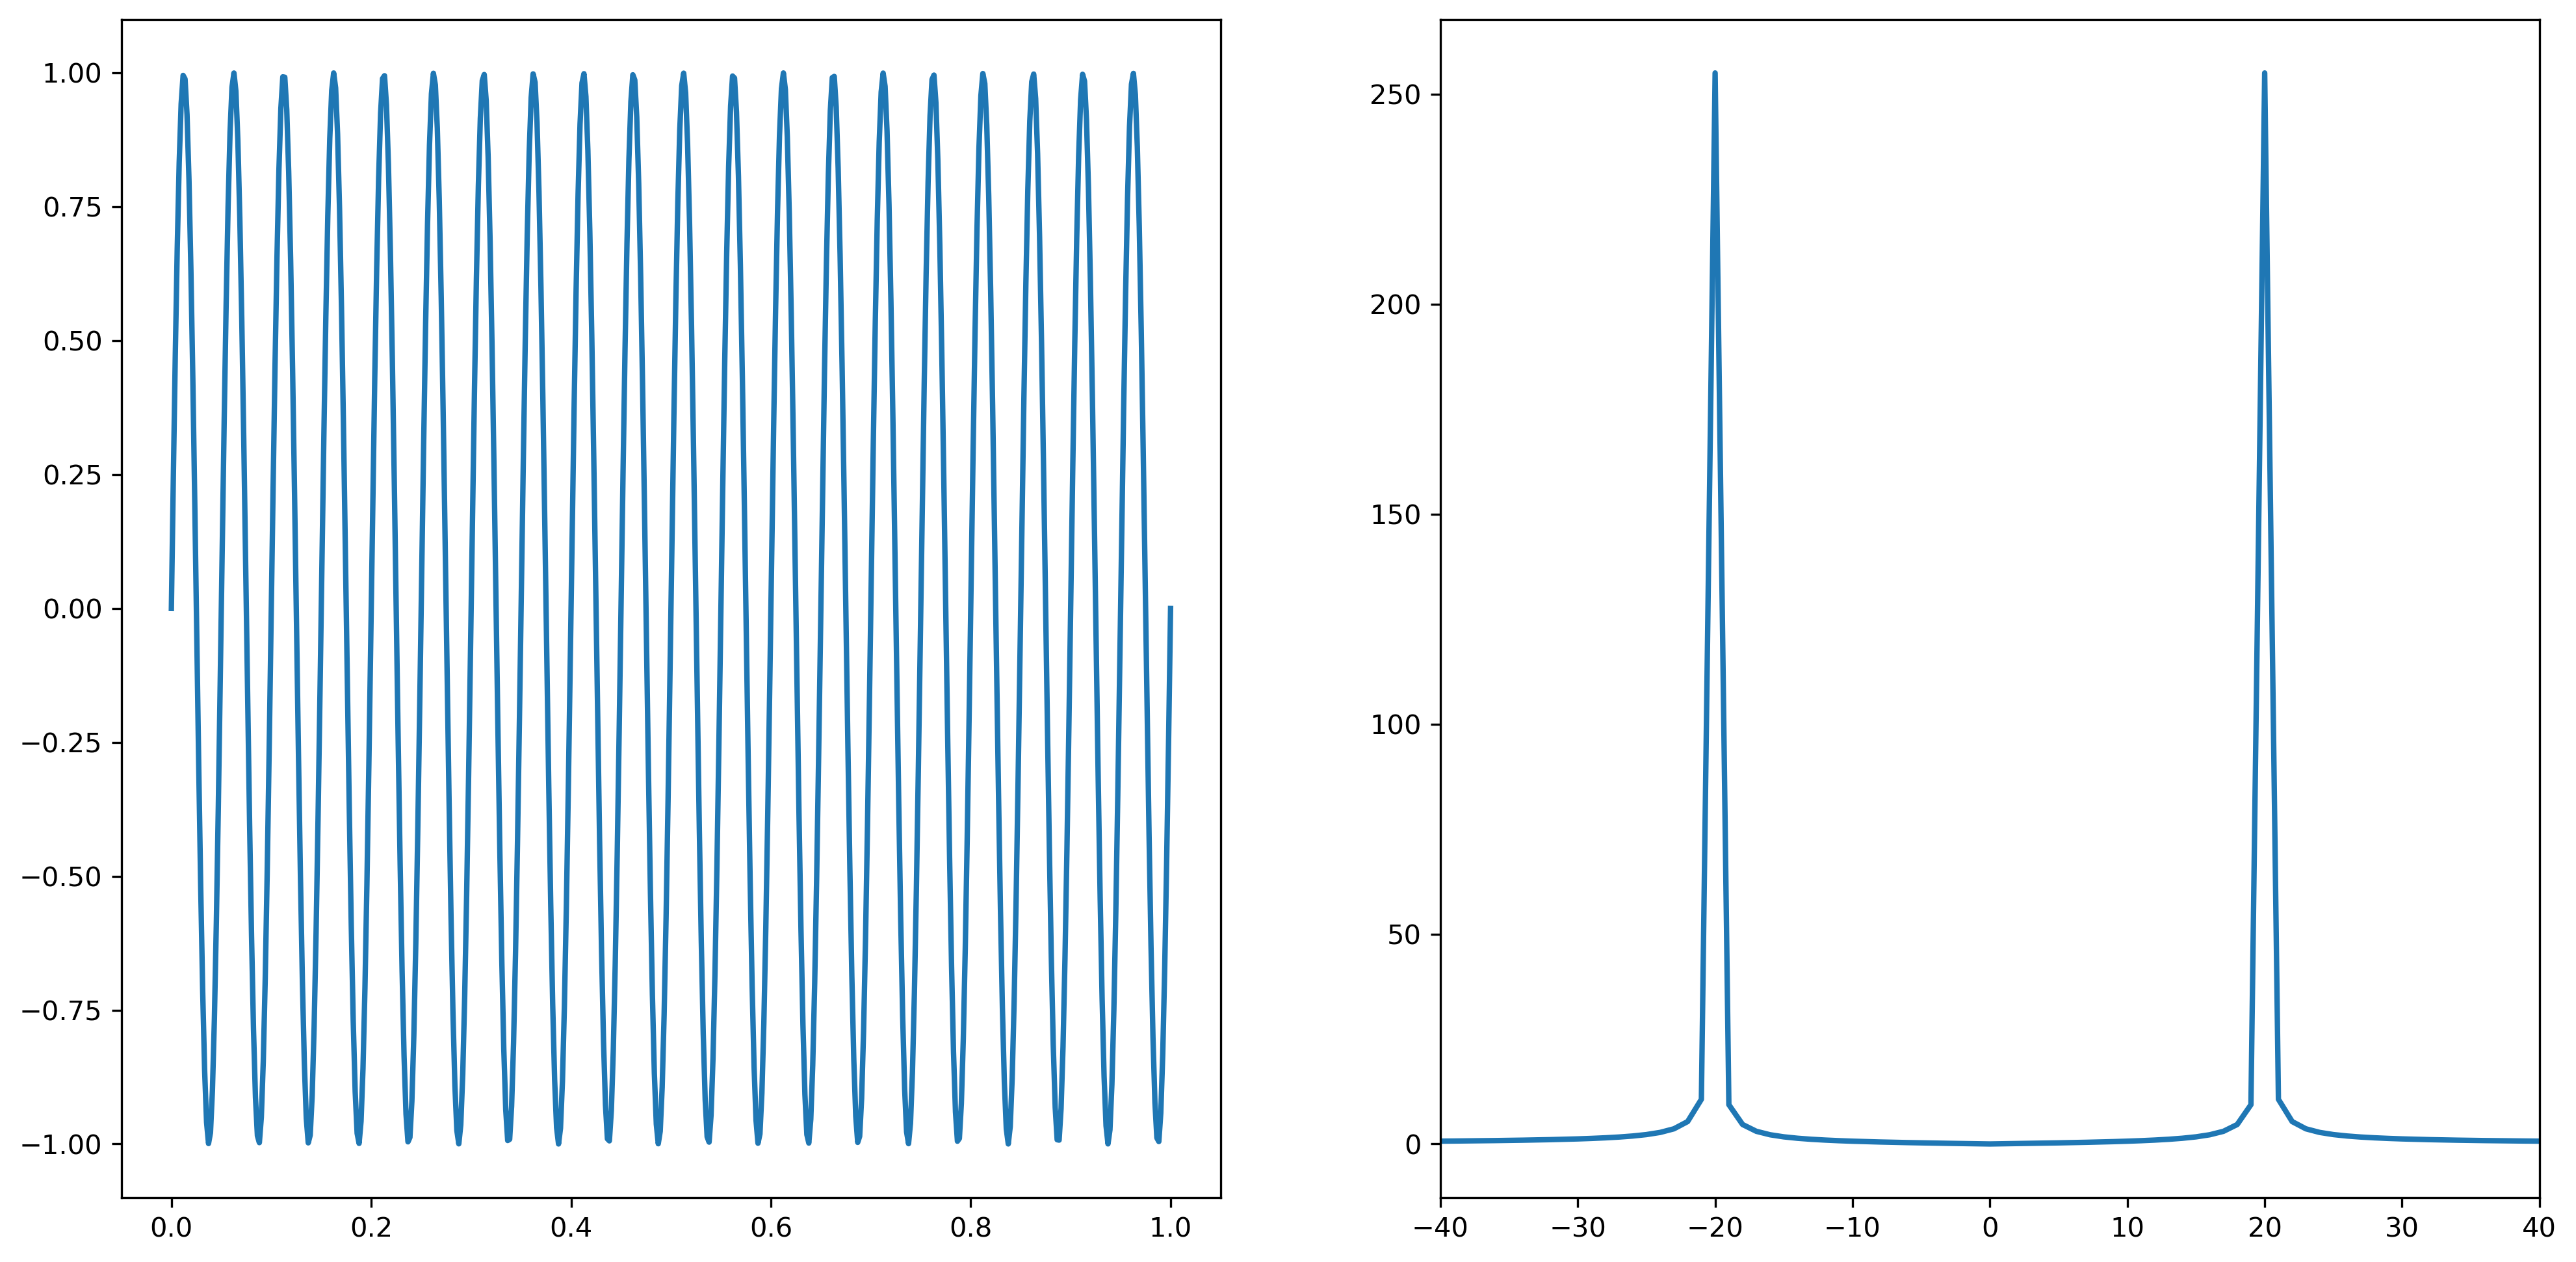

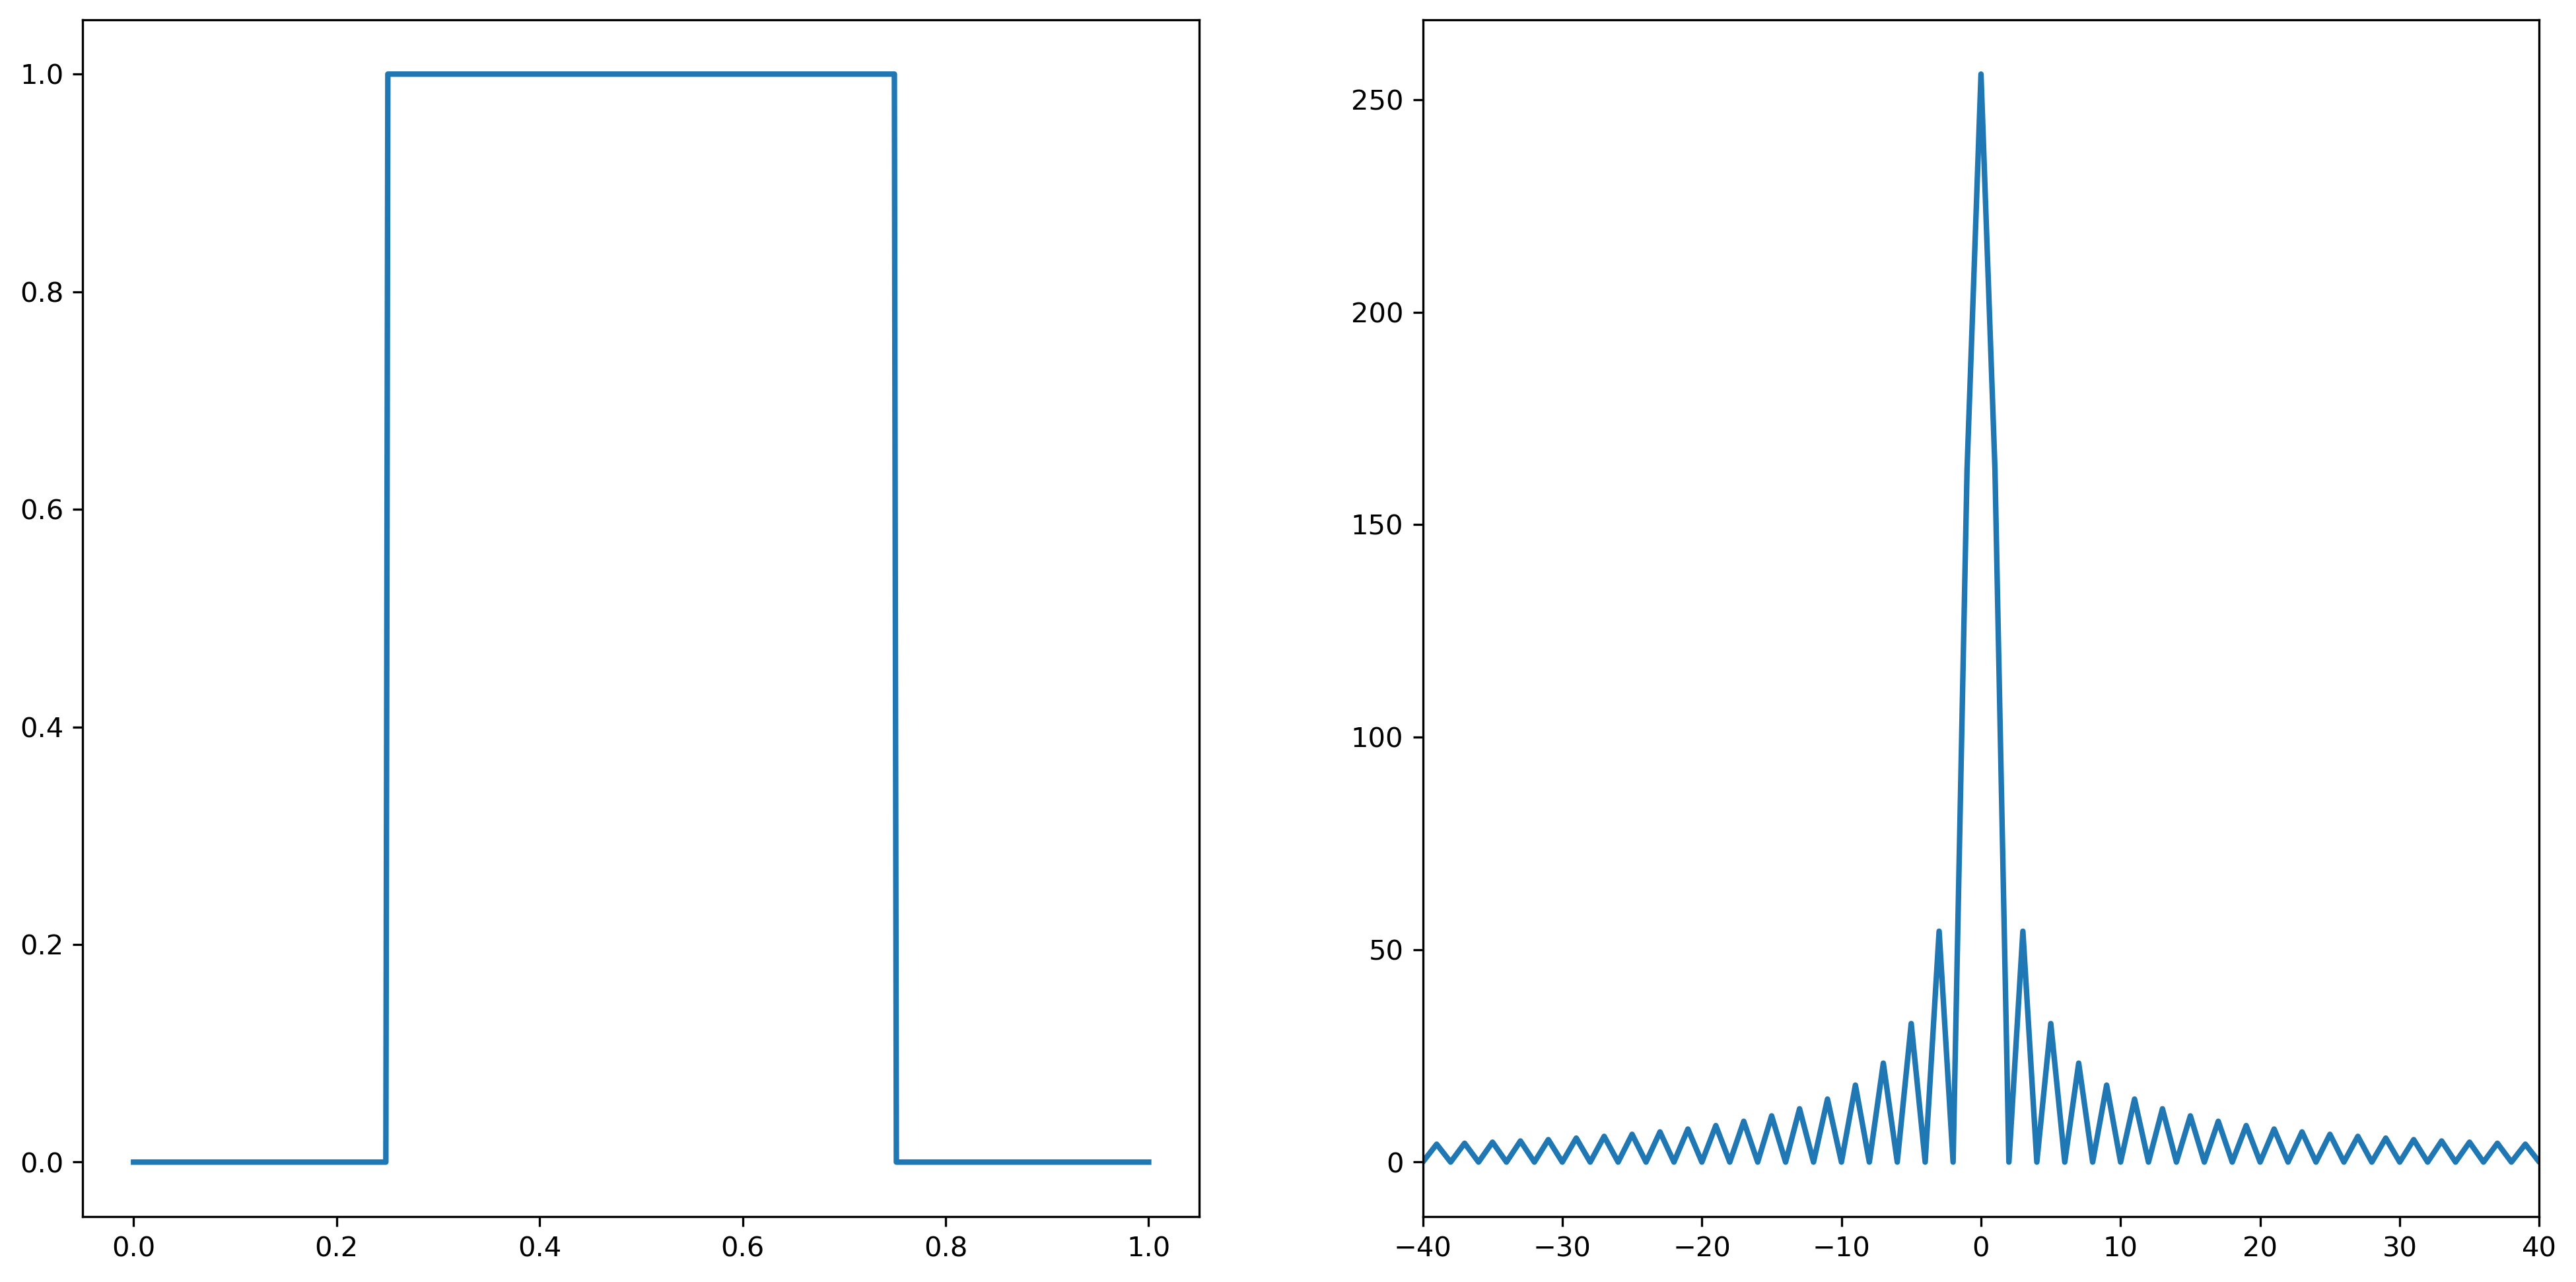

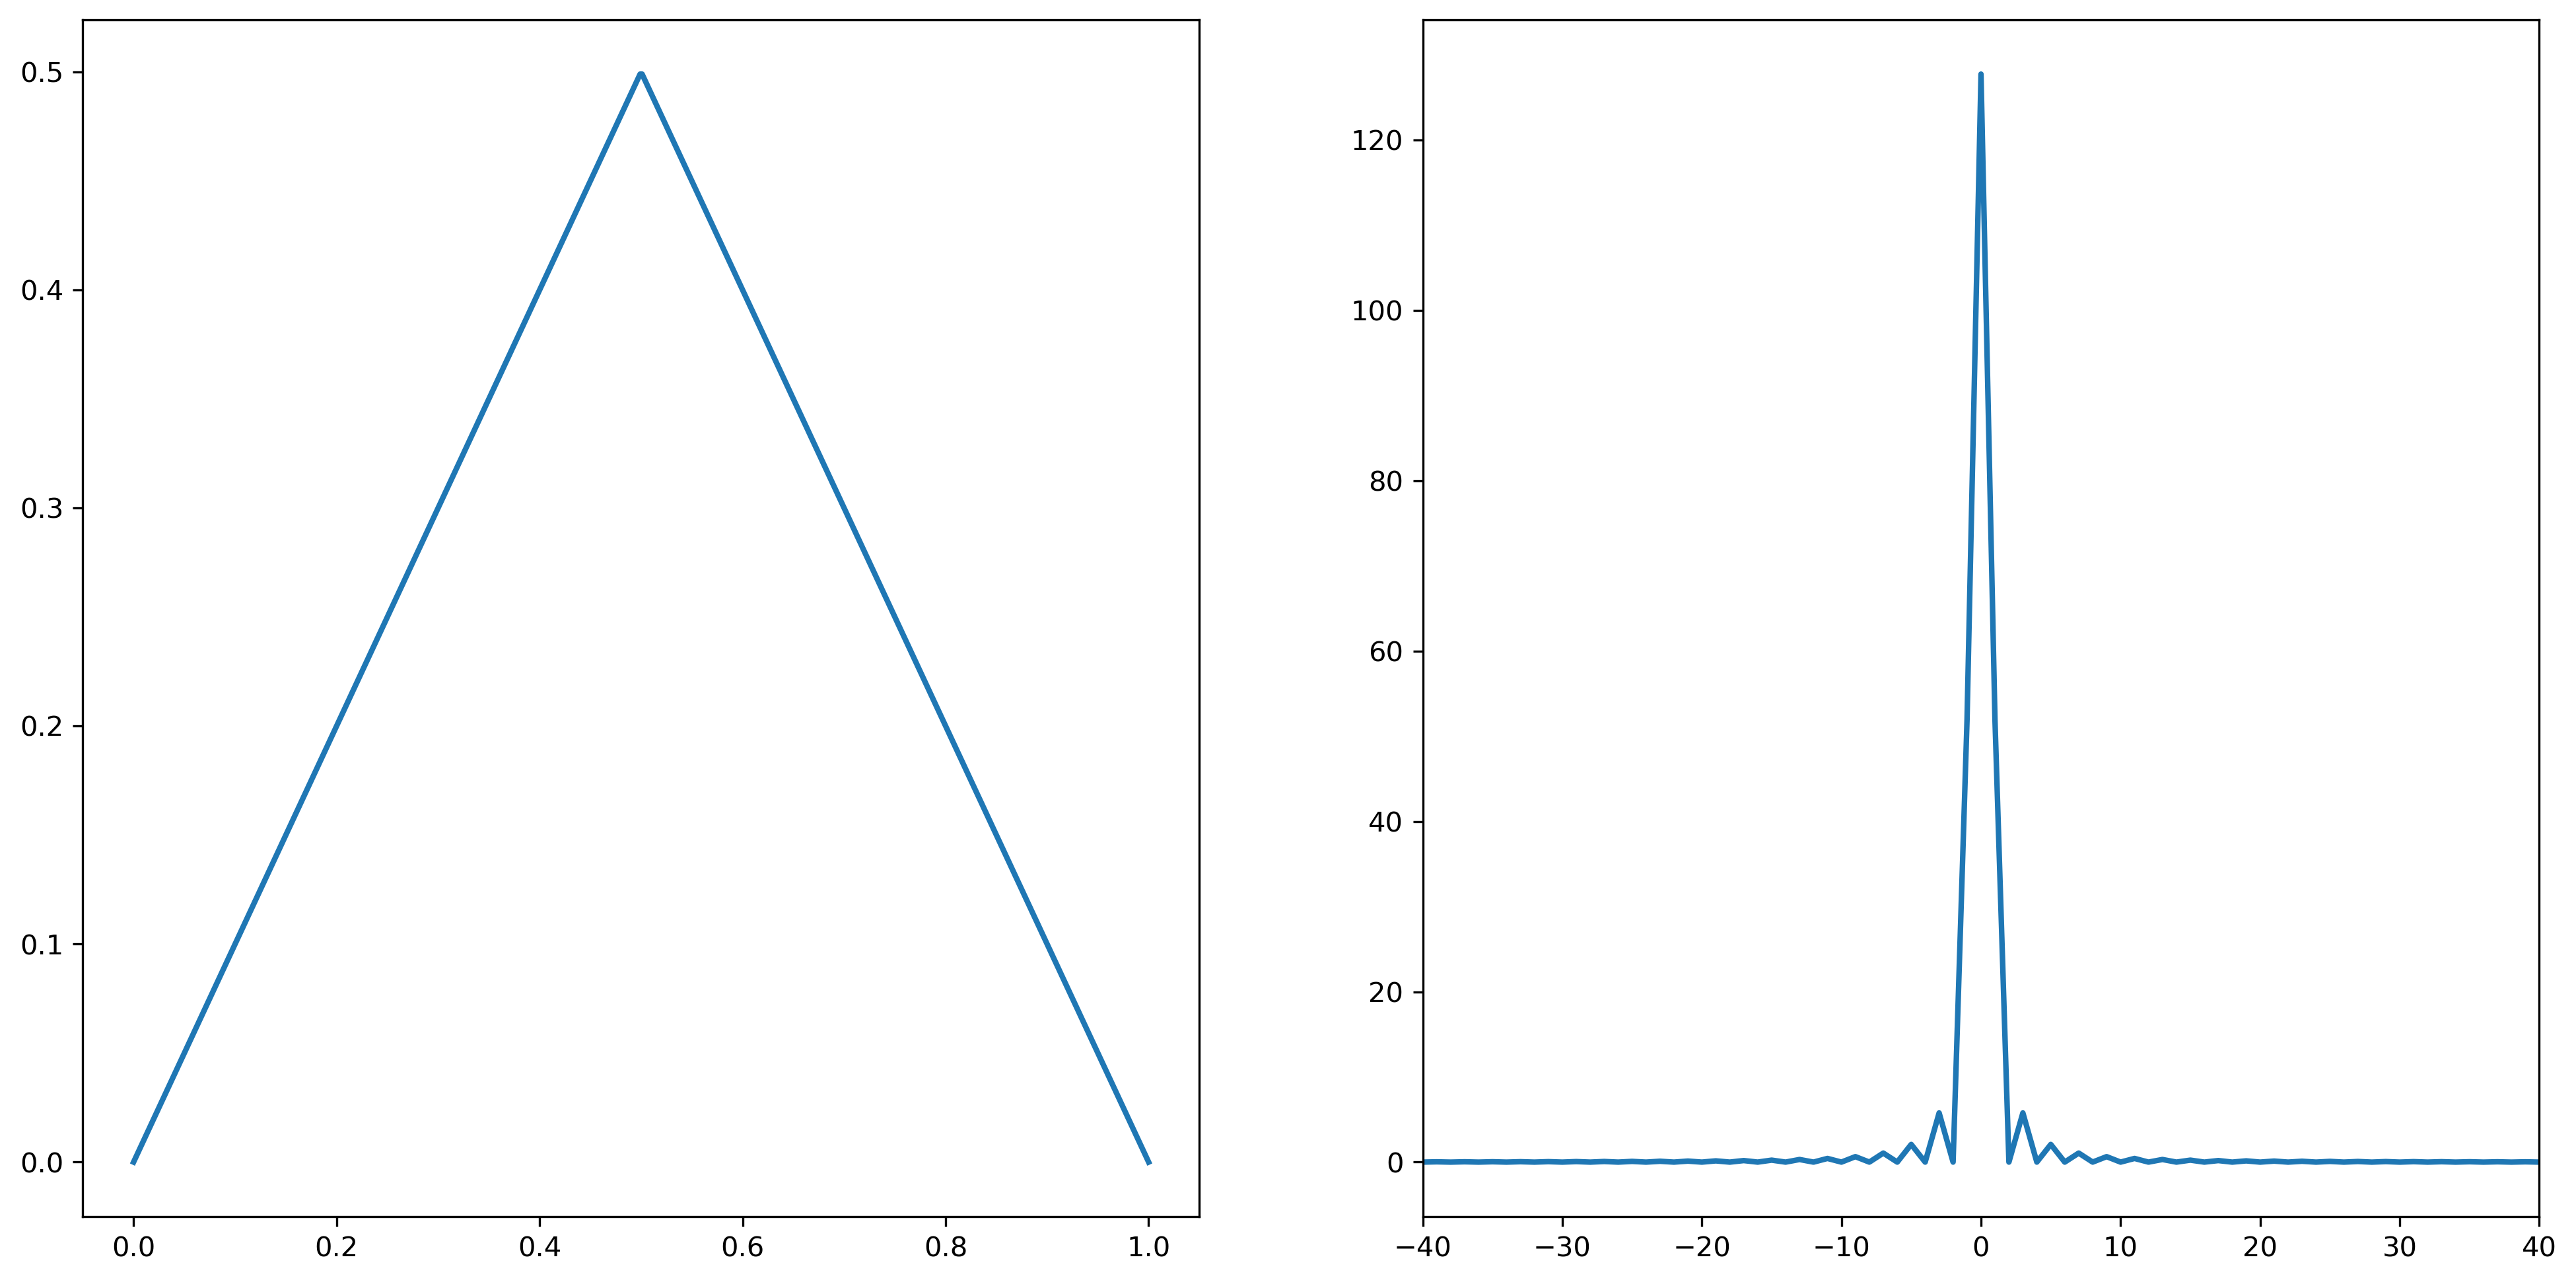

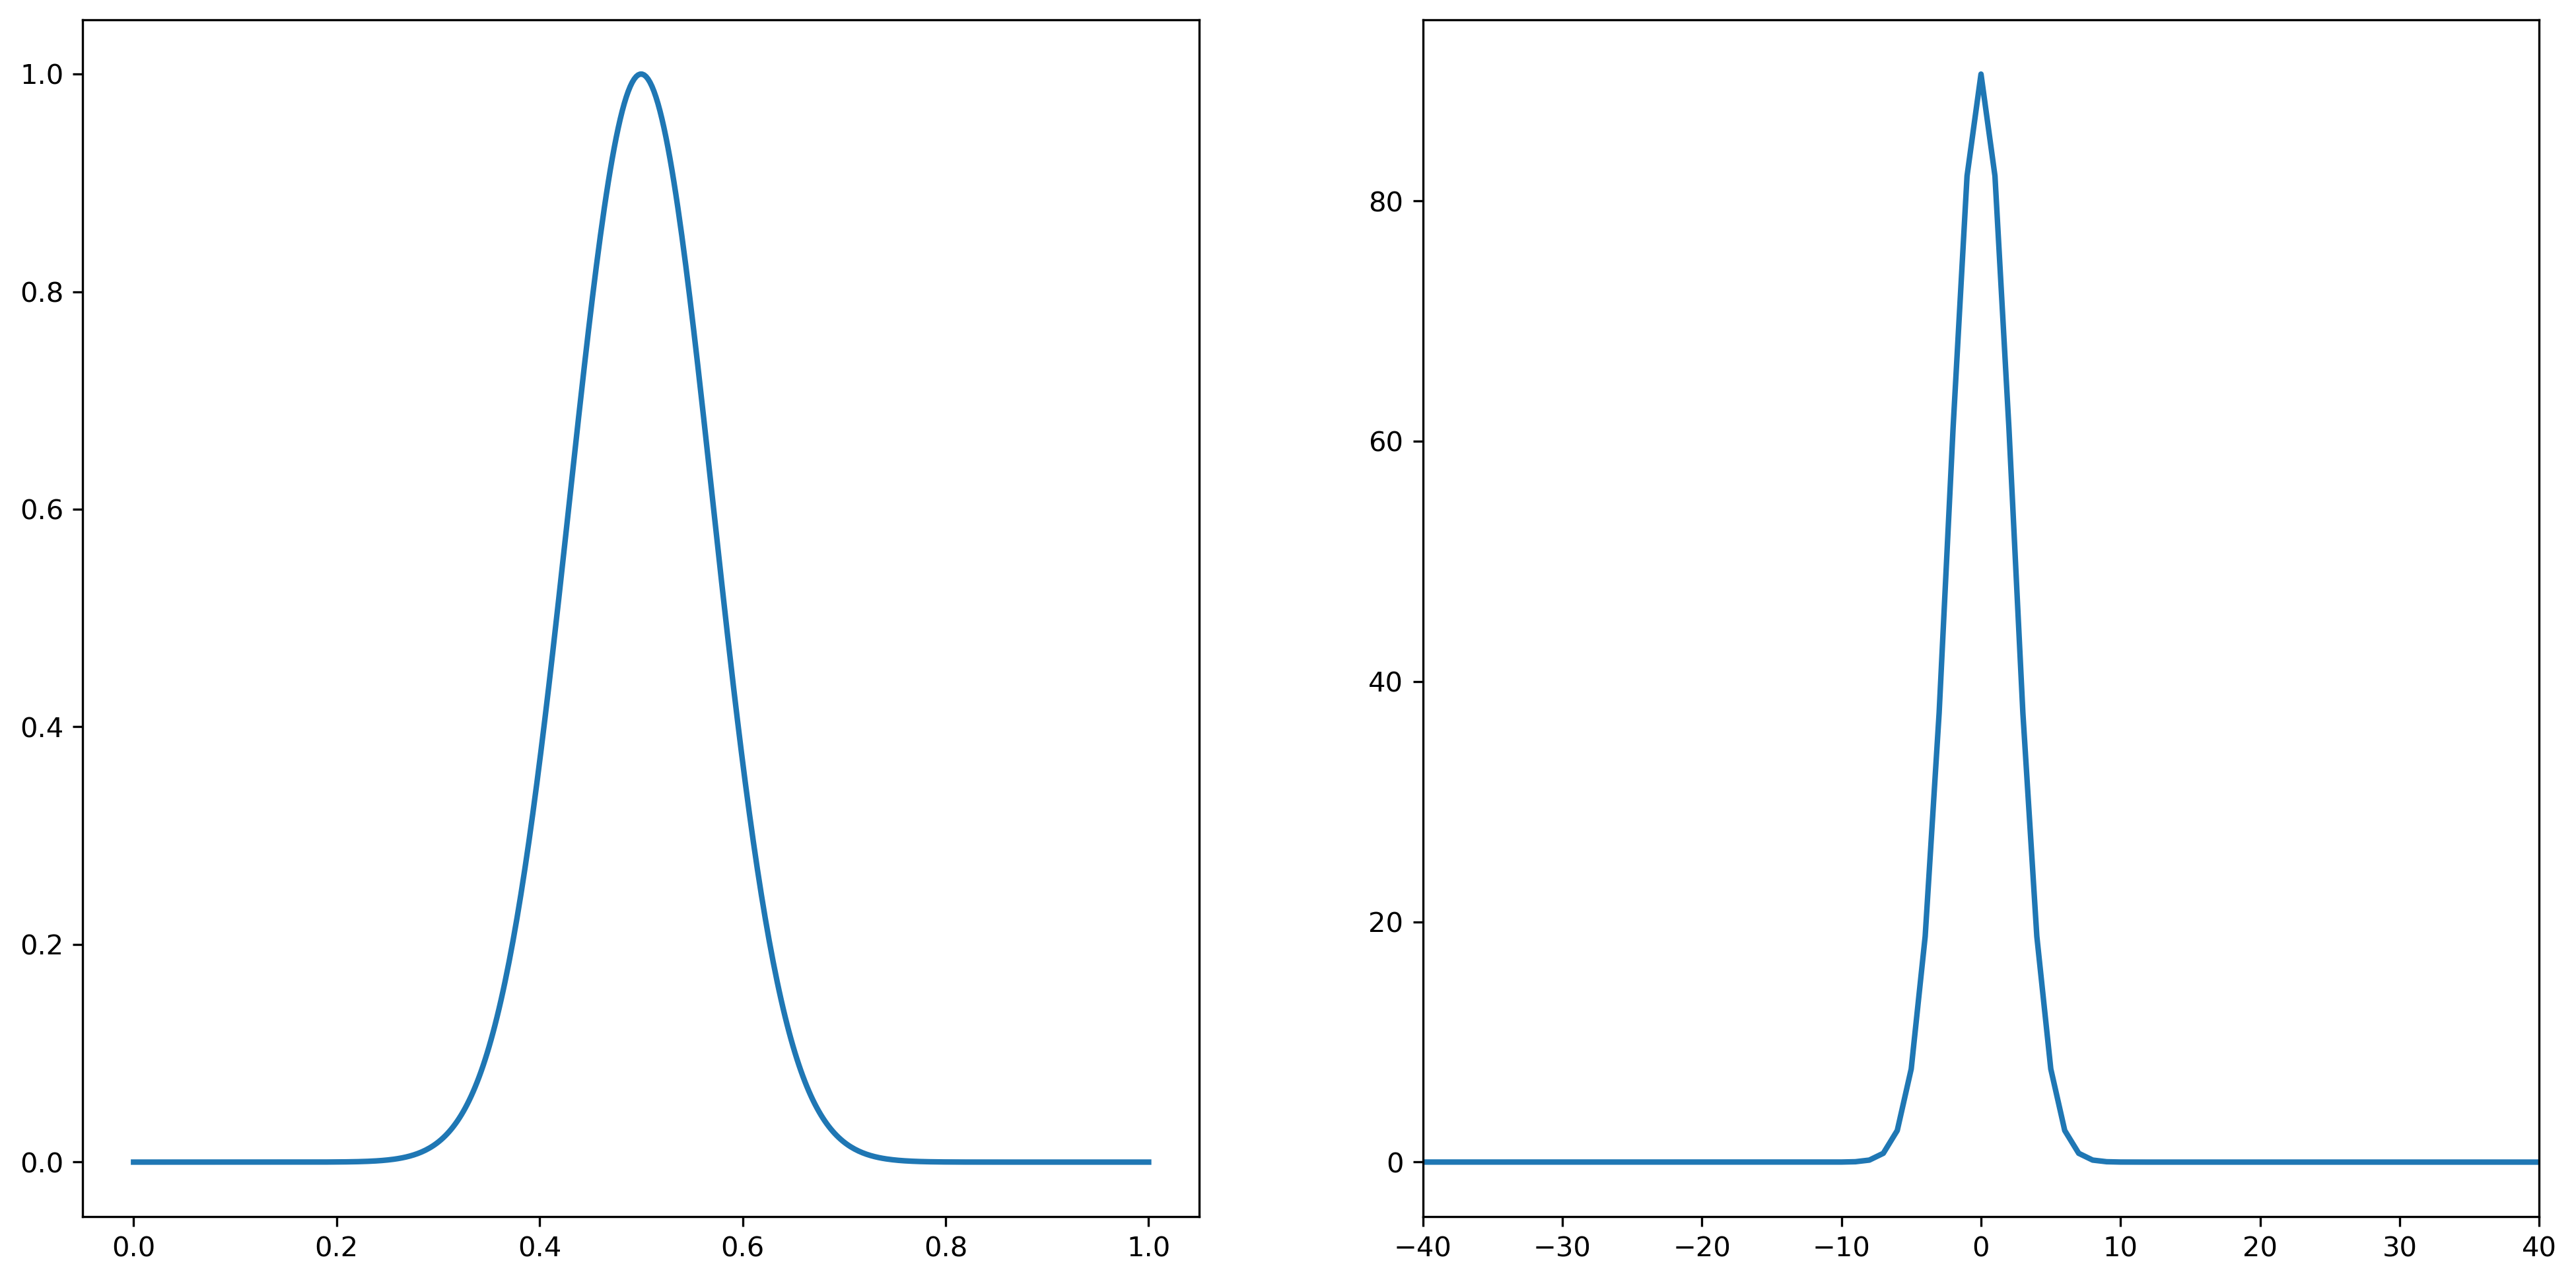

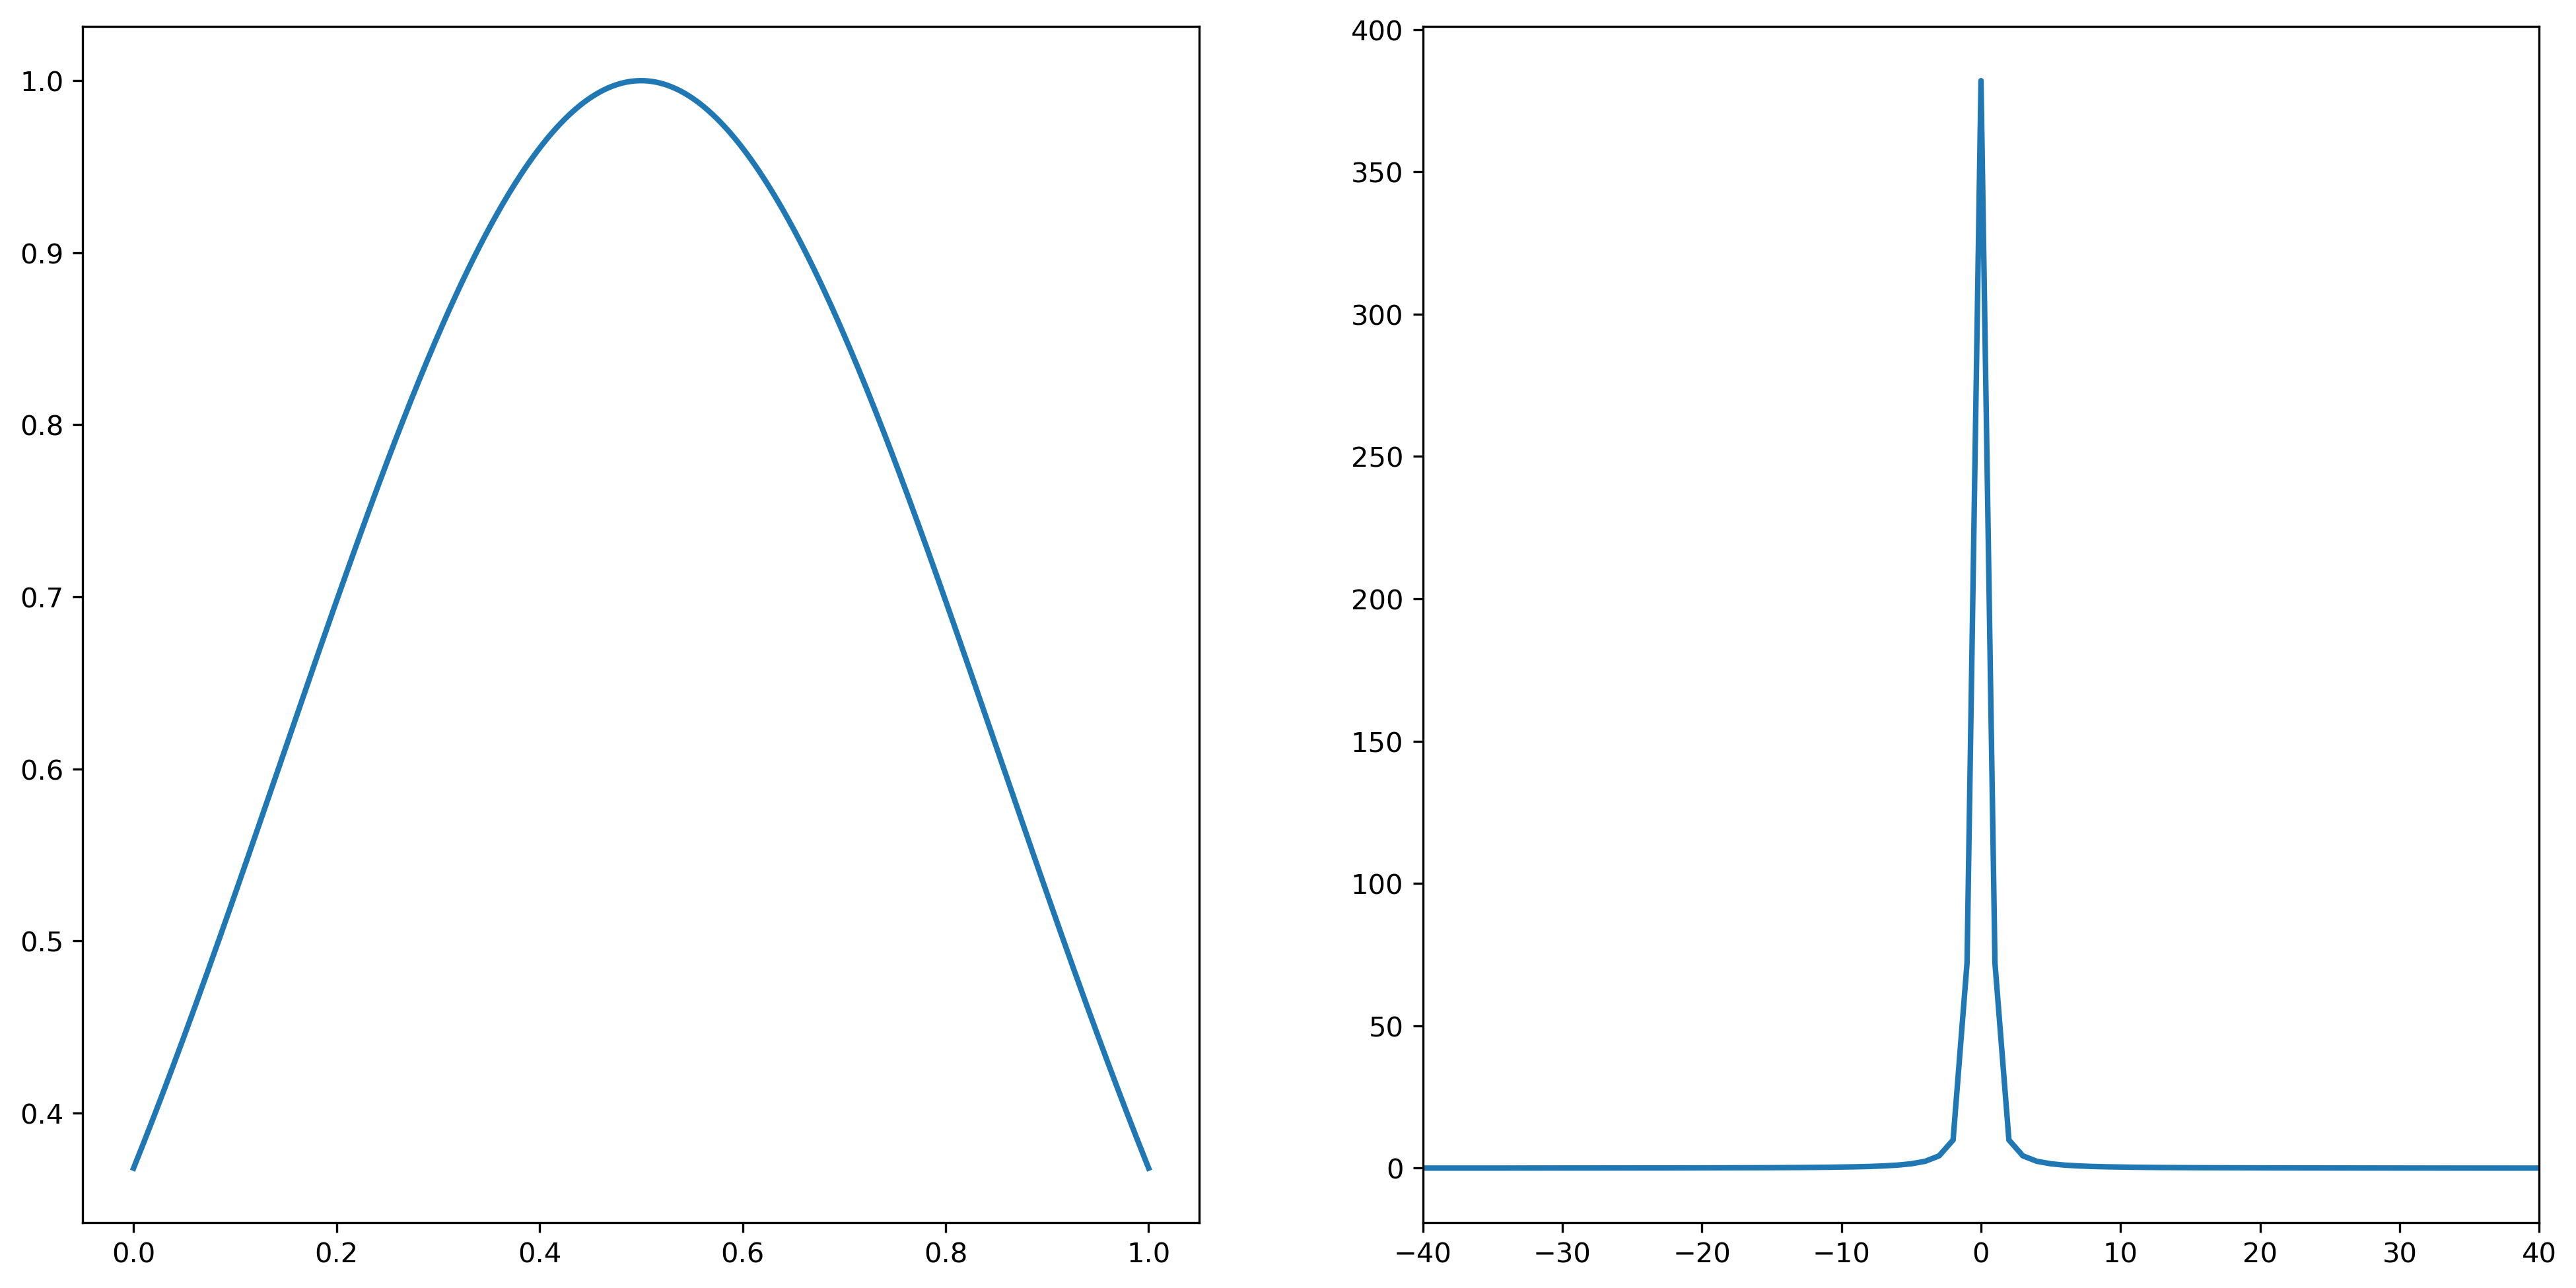

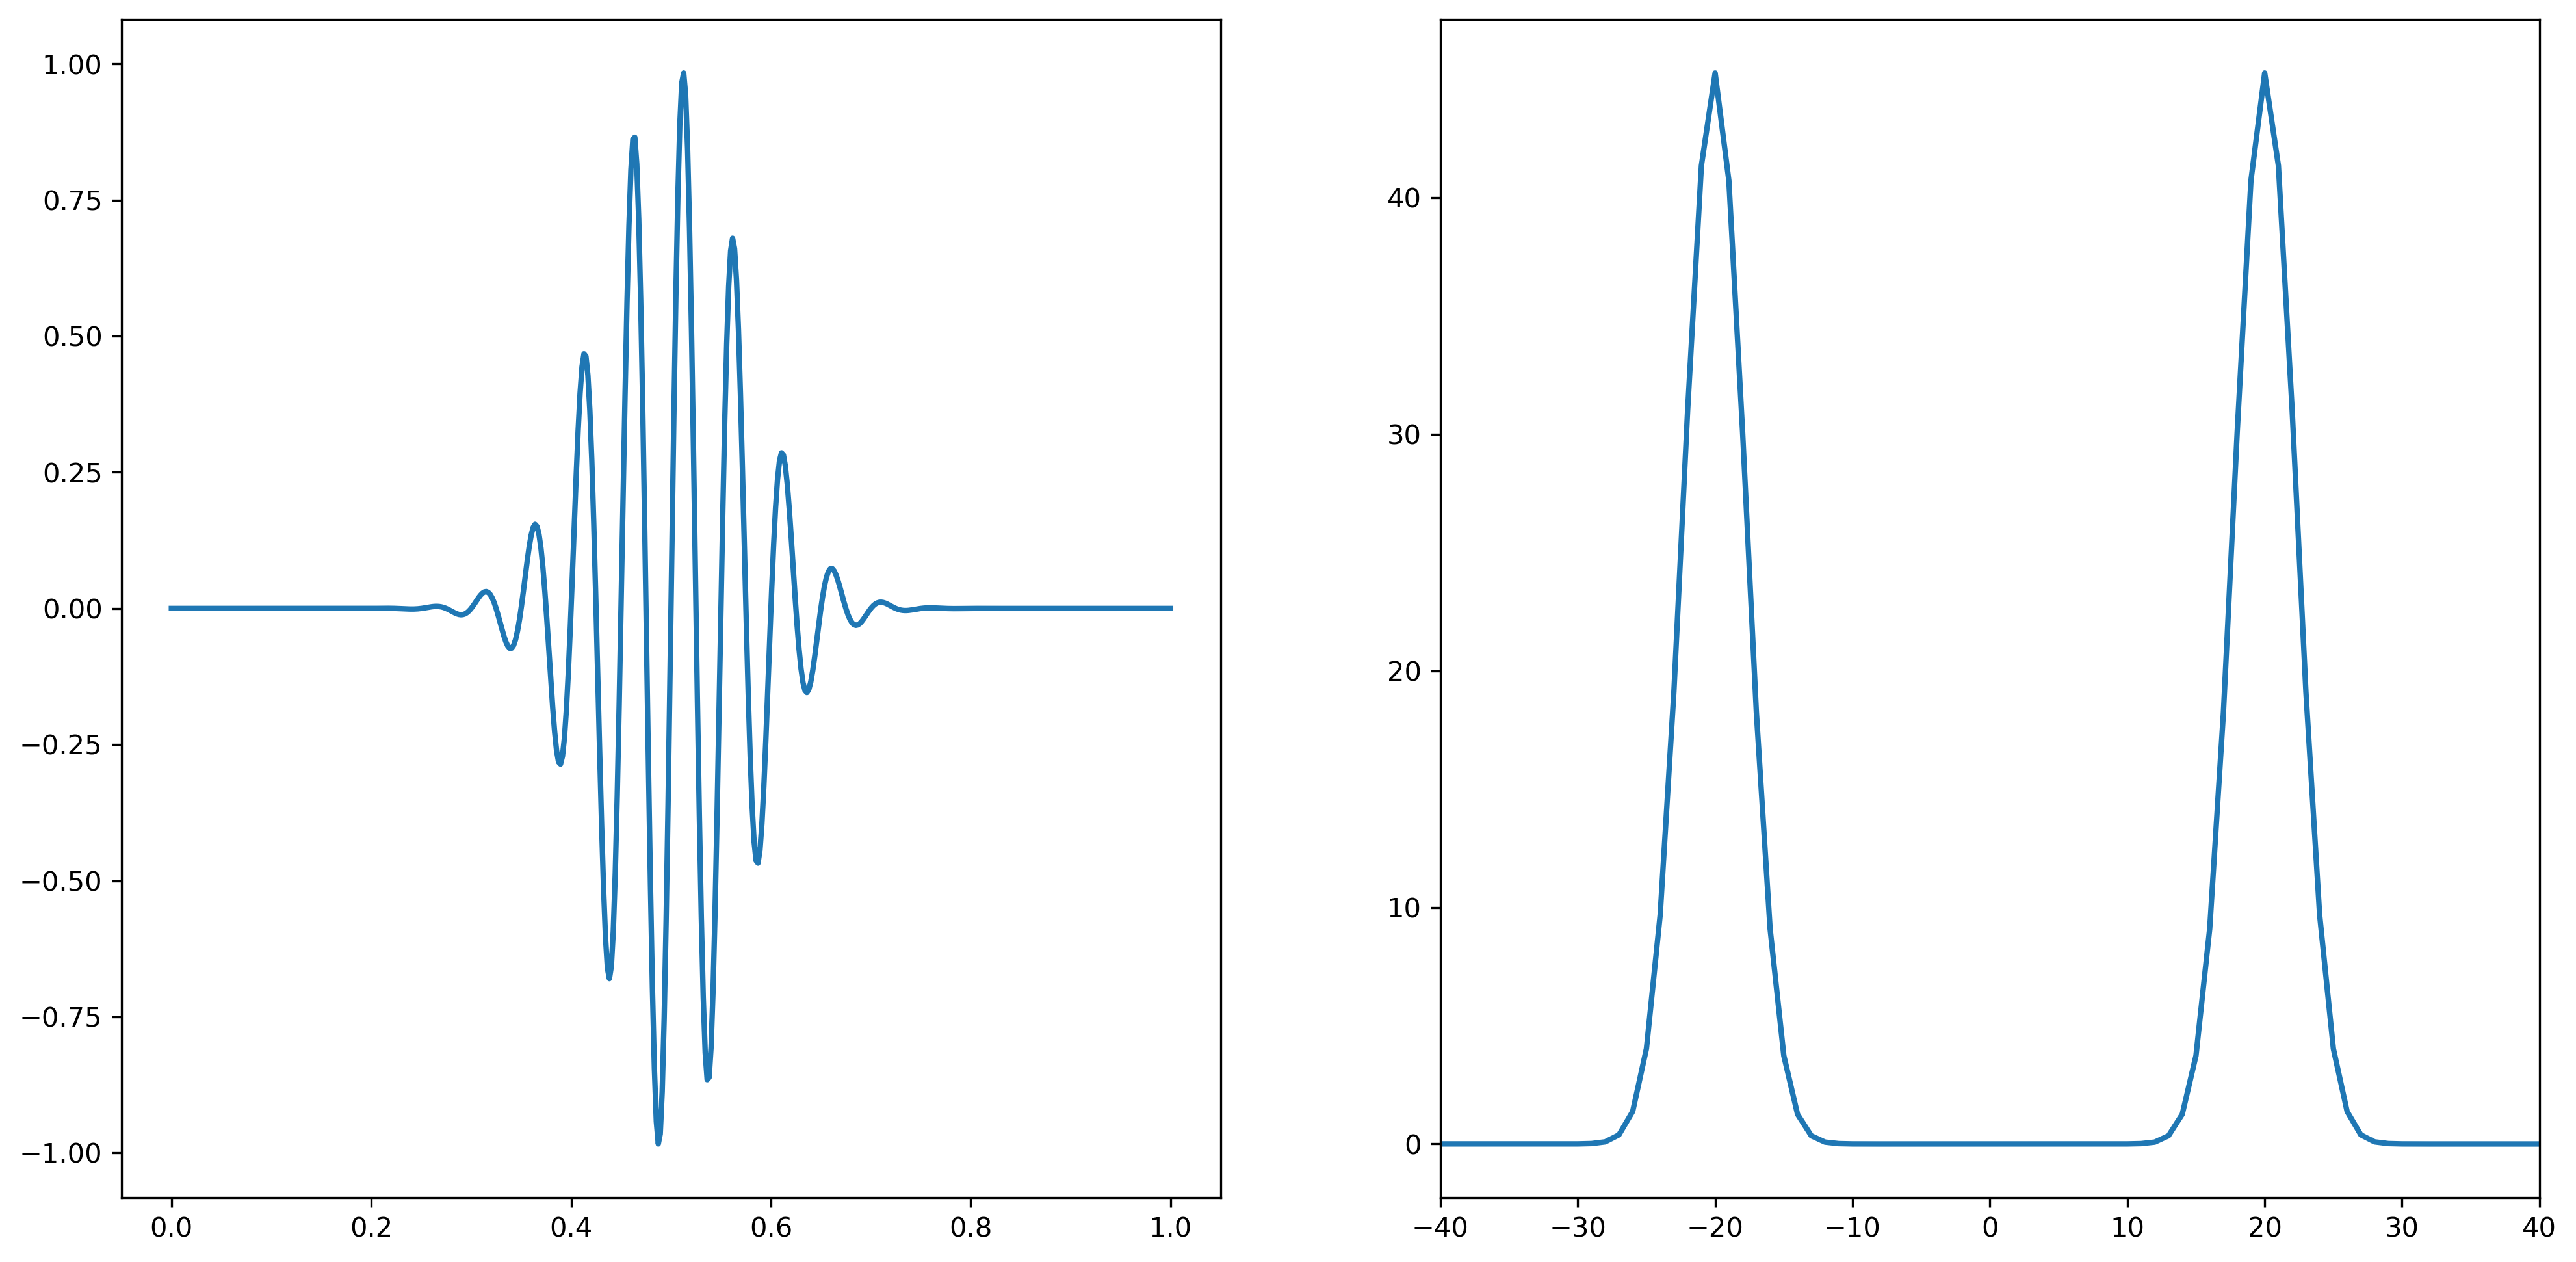

In [31]:
def f1(x):
    return np.sin(40*np.pi*x)

def f2(x):
    return np.logical_and((x >= 0.25), (x < 0.75)) * 1.0

def f3(x):
    return np.amin(np.array([x, 1-x]), axis=0)

def f4(x):
    return np.exp(-100*(x-0.5)**2)

def f5(x):
    return np.exp(-4*(x-0.5)**2)

def f6(x):
    return np.exp(-100*(x-0.5)**2) * np.sin(40*np.pi*x)

fun_list = [f1, f2, f3, f4, f5, f6]
n = 2**9
x = np.linspace(0, 1, n)

c_list = [None, ]
beta_list = [None, ]

for fun in fun_list:
    fig, axis = plt.subplots(1, 2, figsize=(16, 8))
    y = fun(x)
    axis[0].plot(x, y)
    
    yf = sp.fft.fft(y)
    xf = sp.fft.fftfreq(n, 1/n)
    
    xf = sp.fft.fftshift(xf)
    yplot = sp.fft.fftshift(yf)
    
    axis[1].plot(xf, np.abs(yplot))
    axis[1].set_xlim(-40, 40)